# บทที่ 3 การปรับปรุงโครงข่ายประสาทเทียม

จากที่ได้เกริ่นนำในบทที่ผ่านมาว่าการออกแบบและใช้งานโครงข่ายประสาทเทียมในทางปฏิบัติจะเป็นกรรมวิธีที่วนรอบ 
ในช่วงเริ่มต้นของโครงการคงเป็นไปไม่ได้ที่จะกำหนดค่าของไฮเปอร์พารามิเตอร์ต่างๆ ได้อย่างเหมาะสมในทันที เช่นจำนวนชั้นแฝง 
จำนวนเซลล์ในชั้นเหล่านั้น อัตราการเรียนรู้ ฟังก์ชันกระตุ้น ฯลฯ แต่จะต้องผ่านการทดสอบและปรับแต่งแก้ไขจนกว่าจะได้ความแม่นยำตามเป้าหมาย 
ในยุคสมัยนี้ที่ทุกสิ่งทุกอย่างต้องดำเนินการแข่งกับเวลา การศึกษาเกี่ยวกับการปรับแต่งไฮเปอร์พารามิเตอร์จึงเป็นสิ่งที่จำเป็น
เพื่อว่าเราจะทดสอบและแก้ไขเป็นจำนวนรอบน้อยที่สุด ดังนั้นเนื้อหาในบทนี้จะเน้นการปรับแต่งโมเดล DNN จากบทที่ 2 เพื่อให้มีประสิทธิภาพตามต้องการ 
โดยข้อกำหนดของแต่ละโจทย์ปัญหาอาจแตกต่างกันไปตามสมรรถนะของตัวประมวลผลและทรัพยากร จำนวนข้อมูลการฝึก เป็นต้น

ก่อนที่จะกล่าวถึงการปรับปรุงโมเดล DNN ปัจจัยสำคัญอันดับแรกที่ต้องพิจารณาคือการบริหารข้อมูลอย่างไรให้เหมาะสม

## 3.1 การจัดการข้อมูล

เราได้เข้าใจแล้วว่าข้อมูลมีความสำคัญอย่างยิ่งยวดต่อการเรียนรู้เชิงลึก เพราะโมเดล DNN มิใช่ขั้นตอนวิธีที่เขียนเป็นคำสั่งเงื่อนไขตายตัว 
แต่จะถูกขับโดยข้อมูล คือการปรับค่าพารามิเตอร์ของโมเดลในขั้นตอนของการฝึกจนกระทั่งได้ความแม่นยำตามเกณฑ์ที่กำหนด ดังนั้นกล่าวได้ว่า
ประสิทธิภาพของโมเดลขึ้นกับคุณภาพและปริมาณของข้อมูลอย่างมาก 

แนวทางการจัดการข้อมูลสำหรับการเรียนรู้เชิงลึกโดยทั่วไปจะแบ่งข้อมูลเป็น 3 ชุดหลักคือ
1. ชุดข้อมูลสำหรับการฝึก (training set) ใช้ในขั้นตอนการฝึกตามแผนภาพการคำนวณข้างหน้าและย้อนกลับที่ได้อธิบายในบทที่ 2 
โดยมีการวนรอบตามที่กำหนดเพื่อลดค่าสูญเสียและเพิ่มความแม่นยำ 
2. ชุดข้อมูลสำหรับการพัฒนา (development set) คือข้อมูลส่วนหนึ่งที่แยกไว้สำหรับตรวจสอบข้าม (cross validation) เพื่อปรับปรุงโมเดล 
หรือตรวจสอบว่าโมเดลใดให้ผลดีสุดกรณีมีหลายโมเดล
3. ขุดข้อมูลสำหรับทดสอบ (test set) ใช้ในการทดสอบขั้นสุดท้ายเมื่อได้โมเดลที่พอใจแล้ว

ในระบบขนาดเล็กที่ไม่ซับซ้อนมาก เพื่อความง่ายอาจรวมชุดข้อมูล 2,3 เข้าด้วยกันและเรียกเป็นชุดข้อมูลสำหรับทดสอบ 

การแบ่งข้อมูลทั้งหมดออกเป็นชุด 1,2,3 ขึ้นอยู่กับผู้ใช้ นิยมตั้งเป็นอัตราส่วนเช่น 60%, 20%, 20% เช่นมีข้อมูลจำนวน 100,000 ตัวอย่าง 
แบ่งเป็นใช้สำหรับฝึก 60,000 ตัวอย่าง สำหรับพัฒนาและทดสอบอย่างละ 20,000 ตัวอย่าง เป็นต้น ในกรณีที่มีข้อมูลจำนวนมาก เช่นล้านตัวอย่าง 
อาจลดอัตราส่วนชุดข้อมูลพัฒนาและทดสอบน้อยลงเช่นเหลือเพียงอย่างละ 1% 

ข้อควรระวังเกี่ยวกับการใช้ชุดข้อมูลฝึกและทดสอบคือ ข้อมูลต้องมาจากการแจกแจง (distribution) ที่เหมือนกัน 
ตัวอย่างของการใช้ชุดข้อมูลที่ไม่สอดคล้องกันคือ สมมุติว่าต้องการสร้างโมเดลจำแนกสุนัขและแมว เราค้นหาข้อมูลภาพจากอินเทอร์เน็ตเพื่อฝึกโมเดล 
ซึ่งเป็นภาพสัตว์เลี้ยงที่ส่วนใหญ่ถ่ายโดยช่างภาพมืออาชีพ มีความชัดเจนและรายละเอียดสูง
แต่เมื่อนำไปทดสอบหรือใช้งานจากภาพผู้ใช้ที่อาจไม่มีคุณภาพดีเท่าเทียม เช่นเบลอ แสงน้อย จัดองค์ประกอบภาพไม่ดี ผลที่ได้ก็คงไม่เป็นตามที่ต้องการ 

### 3.1.1 ค่าเอนเอียงและความแปรปรวน

รูปที่ 3.1 แสดงตัวอย่างการจำแนกข้อมูลในระนาบ 2 มิติ โดยข้อมูลสองประเภทแทนด้วยวงกลมและสี่เหลี่ยม ในรูป (a) ด้านซ้ายสุดเป็นการจำแนกโดยเส้นตรง
จะเห็นว่าไม่สามารถแบ่งกลุ่มข้อมูลได้ดีเท่าที่ควร คือมีการฟิตตำ่ไป (underfit) เรียกกรณีนี้ว่า มีค่าเอนเอียงสูง (high bias) 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=17vghyzLUAh4xuVnZMRvSxEEmOY0nn8r6" width=750 />
</p>
<div align="center">รูปที่ 3.1 การจำแนกทวิภาคในระนาบ 2 มิติ</div>


**หมายเหตุ :** คำว่าไบแอสหรือค่าเอนเอียงในบริบทนี้ไม่มีความเกี่ยวข้องกับค่าเอนเอียง b ที่เป็นพารามิเตอร์ของโมเดล

หากพิจารณารูป (c) ด้านขวาสุดซึ่งเป็นการฟิตเกิน (overfit) ถึงแม้ว่าจะสามารถจำแนกข้อมูลฝึกได้อย่างสมบูรณ์แต่ก็มีความซับซ้อนเกินความจำเป็น
ไม่สามารถคาดหวังว่าจะทำงานได้ดีกับข้อมูลทดสอบหรือข้อมูลใหม่ที่เข้ามา เรียกกรณีนี้ว่า มีความแปรปรวนสูง (high variance) 
ตัวจำแนกที่อยู่ระหว่างกลางคือรูป (c) ที่เป็นตัวเลือกที่เหมาะสมสำหรับปัญหานี้ กรณีเหล่านี้จะเกิดขึ้นเช่นเดียวกันในระบบหลายมิติ 
การยกตัวอย่างในระนาบ 2 มิติทำให้เห็นภาพได้ชัดเจนขึ้นเท่านั้น 

สาระสำคัญของเนื้อหาในหัวข้อย่อยนี้คือ 
ต้องการหลีกเลี่ยงทั้งกรณีค่าเอนเอียงสูงและความแปรปรวนสูง ในสมัยก่อนจะมีประเด็นที่นิยมกล่าวถึงกันเรียกว่า 
การประนีประนอมระหว่างค่าเอนเอียงและความแปรปรวน (bias-variance tradeoff) 
เนื่องจากการปรับค่าเอนเอียงลดลงมีผลกระทบทำให้ความแปรปรวนสูงขึ้น หรือกลับกัน แต่ในยุคของการเรียนรู้เชิงลึกจะถูกกล่าวถึงน้อยลง 
ทั้งนี้เนื่องจากการใช้โมเดลที่มีขนาดใหญ่สามารถช่วยลดค่าเอนเอียงโดยไม่กระทบความแปรปรวน 
ในทำนองเดียวกันการเพิ่มขนาดของข้อมูลช่วยลดความแปรปรวนได้โดยไม่กระทบกับค่าเอนเอียง

รูปที่ 3.2 แสดงตัวอย่างการจำแนกทวิภาคภาพสุนัขและแมว โดยโมเดลจะให้เอาต์พุตเท่ากับ 0 สำหรับภาพสุนัขและ 1 สำหรับภาพแมว 
เราจะเปรียบเทียบค่าผิดพลาดของกรณี A,B,C,D กํบกรณีตรวจสอบโดยมนุษย์ โดยสมมุติว่ามนุษย์สามารถจำแนกภาพได้โดยมีความผิดพลาดเป็นศูนย์ 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1CkNZsqNEPCHOYyRsjuCODrLbaWgiNipw" width=500 />
</p>
<div align="center">รูปที่ 3.2 ปัญหาการจำแนกภาพสุนัขและแมว</div>

* A. ได้ค่าผิดพลาดจากชุดข้อมูลฝึกเท่ากับ 0.5% และค่าผิดพลาดจากชุดข้อมูลพัฒนาเท่ากับ 1% จัดได้ว่าเป็นโมเดลที่ดี 
คือได้ทั้งค่าเอนเอียงและความแปรปรวนต่ำ 
* B. ได้ค่าผิดพลาดจากชุดข้อมูลฝึกเท่ากับ 1% และค่าผิดพลาดจากชุดข้อมูลพัฒนาเท่ากับ 12% คือกรณีความแปรปรวนสูง 
จะเห็นว่าโมเดลมีความแม่นยำสูงกับข้อมูลฝึก แต่ทำงานได้ไม่ดีกับข้อมูลพัฒนาเนื่องจากการฟิตเกิน 
* C. ได้ค่าผิดพลาดจากชุดข้อมูลฝึกเท่ากับ 20% และค่าผิดพลาดจากชุดข้อมูลพัฒนาเท่ากับ 21% คือกรณีค่าเอนเอียงสูง 
โมเดลทำงานได้ไม่ดีตั้งแต่กับชุดข้อมูลการฝึก และก็ได้ผลใกล้เคียงกันกับชุดข้อมูลพัฒนา คือมีการฟิตต่ำไป
* D. ได้ค่าผิดพลาดจากชุดข้อมูลฝึกเท่ากับ 20% และค่าผิดพลาดจากชุดข้อมูลพัฒนาเท่ากับ 30% คือกรณีทั้งค่าเอนเอียงและความแปรปรวนสูง 
เป็นโมเดลที่ด้อยที่สุดสำหรับทั้ง 4 กรณีที่ยกตัวอย่างมา

### 3.1.2 วิธีพื้นฐานในการลดค่าเอนเอียงและความแปรปรวน

เมื่อตรวจสอบสมรรถนะของโมเดลที่มีต่อข้อมูลชุดฝึกและพัฒนาดังเช่นในตัวอย่างด้านบน เราสามารถตัดสินเบื้องต้นเกี่ยวกับค่าเอนเอียงและความแปรปรวนของโมเดล 
และใช้วิธีการพื้นฐานในการแก้ปัญหาดังนี้

หากพบว่าโมเดลมีค่าเอนเอียงสูง (ต้องการปรับปรุงสมรรถนะต่อข้อมูลฝึก)
* เพิ่มขนาดของ DNN
* เพิ่มจำนวนรอบการฝึก หรือทดลองเปลี่ยนตัวหาค่าเหมาะที่สุด
* อาจทดลองเปลี่ยนสถาปัตยกรรมของโครงข่ายประสาทเทียม 

หากพบว่าโมเดลมีความแปรปรวนสูง (ต้องการปรับปรุงสมรรถนะต่อข้อมูลพัฒนา)
* เพิ่มจำนวนข้อมูล
* ลดการฟิตเกินโดยวิธีเช่นเรกูลาร์ไรเซชันหรือดรอปเอาต์ (จะได้กล่าวถึงต่อไปในบทนี้)
* อาจทดลองเปลี่ยนสถาปัตยกรรมของโครงข่ายประสาทเทียม 

เมื่อปรับเปลี่ยนโมเดลแล้วต้องกลับไปตรวจสอบใหม่จนกว่าจะได้ค่าเอนเอียงและความแปรปรวนอยู่ในเกณฑ์ที่ยอมรับได้

## 3.2 การปรับปรุงโมเดลความแปรปรวนสูง

จากคำอธิบายก่อนหน้านี้ กรณีที่ไม่ต้องการเปลี่ยนสถาปัตยกรรมของโครงข่ายและไม่สามารถเพิ่มข้อมูล 
การปรับปรุงโมเดลที่มีความแปรปรวนสูงคือลดผลจากการฟิตเกิน ซึ่งมีวิธีการที่นิยมอยู่ 2 
วิธีคือการทำเรกูลาร์ไรเซชันและการดรอปเอาต์เซลล์ของโครงข่าย

### 3.2.1 การเรกูลาร์ไรเซชันโครงข่ายประสาทเทียม

วิธีการเรกูลาร์ไรเซชัน (regularization) เป็นทางแก้หนึ่งสำหรับปัญหาฟิตเกินที่ทำให้เกิดความแปรปรวนสูง 
แนวทางคือการลดค่าน้ำหนักในเซลล์ของโครงข่ายประสาทเทียม เมื่อผลตอบสนองของบางเซลล์ถูกลดลงจะช่วยแก้การฟิตเกินลงได้
(หลักการเช่นเดียวกันถูกใช้ในวิธีการดรอปเอาต์โดยตัดบางเซลล์ในโครงข่ายออก) หากเปรียบเทียบการจำแนกทวิภาคในรูปที่ 3.1 
เรกูลาร์ไรเซชันจะช่วยเปลี่ยนเอาต์พุตที่มีความแปรปรวนสูง (c) เข้าสู่เอาต์พุตทางด้านซ้าย (a)
โดยหากปรับพารามิเตอร์อย่างเหมาะสมคาดหวังที่จะได้การจำแนกประมาณในภาพกลาง (b) หรือหากมองในอีกแง่มุมหนึ่ง 
การลดค่าน้ำหนักทำให้ฟังก์ชันกระตุ้นเช่น $\sigma()$ หรือ $tanh()$ ทำงานในช่วงที่เป็นเชิงเส้นมากขึ้น

การลดค่าน้ำหนักทำได้โดยเพิ่มพจน์ลงโทษค่าน้ำหนักในฟังก์ชันมูลค่า ยกตัวอย่างกรณีโมเดลการถดถอยลอจิสติก ฟังก์ชันมููลค่าใหม่จะเขียนได้เป็นดังนี้

$$
J(w,b) = \frac{1}{m}\sum_{i=1}^m\mathcal{L}(\hat{y}^{(i)},y^{(i)})+\frac{\lambda}{2m}\lVert w\rVert_2^2 \tag{3.1}
$$

โดยค่า $\lambda$ เรียกว่าพารามิเตอร์การเรกูลาร์ไรเซชัน เป็นไฮเปอร์พารามิเตอร์ซึ่งต้องถูกเลือกโดยผู้พัฒนา 
เวกเตอร์ $w \in \mathbf{R}^{n_x}$ คือเวกเตอร์ของค่าน้ำหนัก 
และ $\lVert w\rVert_2^2 = \sum_{j=1}^{n_x}w_j^2 = w^Tw$ 
คือกำลังสองของค่านอร์มสองของ $w$ ดังนั้น (3.1) ถูกเรียกแบบเต็มว่าการเรกูลาร์ไรเซชันแบบ L2

ผู้อ่านอาจสงสัยว่าทำไมเราเพิ่มแต่พจน์ที่ขึ้นกับ $w$ ในฟังก์ชันมูลค่าโดยไม่สนใจค่าเอนเอียง $b$ เหตุผลคือค่าเอนเอียงเป็นเพียงตัวเลขสเกลาร์ตัวเดียว 
ค่าน้ำหนักเป็นเวกเตอร์ความยาว $n_x$ จึงมีผลกระทบต่อโครงข่ายโดยรวมมากกว่า เราสามารถใส่พจน์ลงโทษค่าเอนเอียงลงใน $J(w,b)$ 
ได้หากต้องการ แต่ก็เพียงทำให้สมการซับซ้อนขึ้นโดยไม่มีผลเด่นชัด

การเรกูลาร์ไรเซชันมีรูปแบบอื่น เช่นแบบ L1 ที่พจน์สุดท้ายด้านขวาของ (3.1) เขียนอยู่ในรูป
$$
\frac{\lambda}{2m}\lVert w \rVert_1 = \frac{\lambda}{2m}\sum_{i=1}{n_x}|w| \tag{3.2}
$$

ผลจาการใช้เรกูลาร์ไรเซชันแบบ L1 คือทำให้เวกเตอร์ $w$ เป็นแบบมากเลขศูนย์ (sparse) เป็นเสมือนการบีบอัดโมเดล 
ในทางปฏิบัติจะพบการเรกูลาร์ไรเซชันแบบ L2 มากกว่า

สำหรับโมเดล DNN เมื่อใช้เรกูลาร์ไรเซชันแบบ L2 ฟังก์ชันมูลค่าจะเขียนได้เป็นดังนี้
$$
J(W^{[1]},b^{[1]}, \ldots,W^{[L]},b^{[L]}) = \frac{1}{m}\sum_{i=1}^{m}\mathcal{L}(\hat{y}^{(i)},y^{(i)})+\frac{\lambda}{2m}\sum_{l=1}^{L}\lVert W^{[l]}\rVert_F^2 \tag{3.3}
$$
จากทฤษฎีพีชคณิตเชิงเส้น นอร์มของเมทริกซ์ $W$ จะไม่เรียกว่านอร์ม L2 แต่มีชื่อเรียกว่า นอร์มโฟรเบนิอุส (Frobenius norm) ใช้สัญลักษณ์ $\lVert . \rVert_F$ นิยามได้เป็น
$$
\lVert W^{[l]}\rVert_F^2 = \sum_{i=1}^{n^{[l]}} \sum_{j=1}^{n^{[l-1]}} \left(w_{i,j}^{[l]}\right)^2 \tag{3.4}
$$

จากขั้นตอนในแผนภาพการคำนวณย้อนหลังเมื่อมีการใช้เรกูลาร์ไรเซชันอธิบายได้ดังนี้ พิจารณาชั้น $l$ กรณีไม่มีเรกูลาร์ไรเซชัน 
ขั้นตอนวิธีการแพร่กระจายย้อนหลังจะให้ผลลัพธ์ $\frac{\partial J}{\partial W^{[l]}}$ ซึ่งเราเขียนแทนโดยย่อว่า $dW^{[l]}$ 
เรียกพจน์นี้ว่า $[BP]$ ดังนั้นเมื่อเพิ่มพจน์เรกูลาร์ไรเซชัน จะได้ว่า
$$
dW^{[l]} = [BP] + \frac{\lambda}{m}W^{[l]} \tag{3.5}
$$
และสมการอัพเดตเมทริกซ์ค่าน้ำหนัก
$$
W^{[l]} := W^{[l]} -\alpha (dW^{[l]}) = W^{[l]} -\alpha ([BP] + \frac{\lambda}{m}W^{[l]})
$$
เมื่อจัดรูปแล้วจะได้เป็น
$$
W^{[l]} := W^{[l]} -\frac{\alpha\lambda}{m} W^{[l]} -\lambda [BP] \tag{3.6}
$$

จากสมการ (3.6) ทำให้เรกูลาร์ไรเซชันนี้มีชื่อเรียกอีกอย่างหนึ่งว่า "การลดระดับค่าน้ำหนัก" (weight decay) เนื่องจากเมทริกซ์น้ำหนักจะถูกปรับค่าด้วยตัวประกอบ 
$(1-\frac{\alpha\lambda}{m})$ ที่มีค่าน้อยกว่าหนึ่งทุกครั้งของการอัพเดต 

**ตัวอย่าง 3.1**

ในตัวอย่างนี้จะต้องการใช้ไลบรารีสนับสนุน mlxtend (https://github.com/rasbt/mlxtend) 
สำหรับพล็อตเส้นแสดงเขตการจำแนก สามารถติดตั้งไลบรารีโดยรันเซลล์ด้านล่าง

In [ ]:
!pip install mlxtend

นำเข้าไลบรารีทั้งหมดที่ใช้งาน

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.io import loadmat
import sklearn
import sklearn.datasets
from mlxtend.plotting import plot_decision_regions

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

ตัวอย่างนี้ใช้ข้อมูลในแบบฝึกหัดสัปดาห์แรกของคอร์สออนไลน์ 
"Improving Deep Neural Networks: Hyperparameter tuning, Regularization and Optimization" 
โดย Prof.Andrew NG สำหรับผู้สนใจสามารถลงทะเบียนเรียนได้ที่ Coursera 
ในแบบฝึกหัดเพิ่มความน่าสนใจของโจทย์เป็นตำแหน่งผู้เล่น 2 
ทีมที่มีโอกาสโหม่งลูกฟุตบอลเมื่อผู้รักษาประตูเตะลูกมาในสนาม แต่โดยหลักการแล้วคือการจำแนกทวิภาคของข้อมูล 
2 กลุ่มในระนาบสองมิติ ในการสร้างและฝึกโมเดลจะใช้โค้ดไพธอนเช่นเดียวกับในบทที่ 2 
ผู้เรียนต้องเพิ่มส่วนเรกูลาร์ไรเซชัน (3.3) ลงในโค้ด ซึ่งสามารถทำให้เข้าใจได้อย่างถ่องแท้ 
แม้ว่าจะต้องอาศัยประสบการณ์การพัฒนาโปรแกรมโดยภาษาไพธอนอยู่พอสมควร ดังนั้นสำหรับในตัวอย่างนี้เราจะใช้ไลบรารี TF 
สร้างโมเดล DNN ซึ่งมีตัวเลือกในการทำเรกูลาร์ไรเซชันให้กับแต่ละชั้นของโมเดล

ข้อมูลถูกเก็บในไฟล์ "data.mat" ที่เราจะใส่ในไดเรคทอรี "datasets/" 
เขียนฟังก์ชัน ex31_load_data() เพื่อโหลดข้อมูลฝึกและทดสอบเข้าสู่แอเรย์พร้อมกับพล็อตในระนาบ 2 
มิติดังแสดงในรูปที่ 3.3

In [4]:
def ex31_load_dataset():
    data = scipy.io.loadmat('datasets/data.mat')
    train_X = data['X']
    train_Y = data['y']
    test_X = data['Xval']
    test_Y = data['yval']
    for i in range(len(train_Y)):
        if train_Y[i,0] == 1:
            plt.scatter(train_X[i,0],train_X[i,1],c='orange', marker='^',s=40)
        else:
            plt.scatter(train_X[i,0],train_X[i,1],c='blue', marker='s',s=40)
    return train_X, train_Y, test_X, test_Y

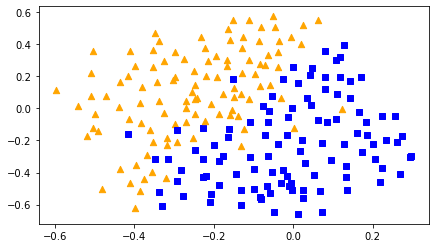

In [5]:
train_X, train_Y, test_X, test_Y = ex31_load_dataset()

รูปที่ 3.3 ข้อมูลสองมิติที่ต้องการจำแนกในตัวอย่าง 3.1

แอเรย์ข้อมูลที่คืนจากฟังก์ชัน ex31_load_dataset() เป็นชุดฝึก 211 จุดและชุดทดสอบ 200 จุด จากการประมาณโดยสายตา 
ข้อมูลในระนาบ 2 มิติในรูปที่ 3.3 สามารถถูกจำแนกได้โดยเส้นตรงในแนวทแยงมุม 
โดยพิจารณาจุดที่หลุดออกไปไกลจากกลุ่มเป็นเสมือนการรบกวน แต่โมเดลที่มีความแปรปรวนสูงจะมีแนวโน้มฟิตเกิน 
คือให้ความสำคัญกับจุดที่เป็นการรบกวนมากเกินไป 

เริ่มต้นโดยสร้างโมเดล DNN 3 ชั้นที่มีจำนวนเซลล์ 20, 30, 1 เป็นเส้นฐาน (baseline) โดยใช้ไลบรารี TF ดังนี้

In [6]:
model = Sequential([
    Flatten(input_shape=[2]),
    Dense(20, activation='relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

คอมไพล์โมเดลตามรูปแบบการจำแนกทวิภาคที่ได้อธิบายในบทที่ 2 ผู้อ่านสามารถปรับอัตราการเรียนรู้ตามต้องการ

In [7]:
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

ฝึกโมเดลจำนวน 10000 รอบ เก็บข้อมูลฝึกในดิกชันนารี history (ตัวเลือก batch_size=None กำหนดเพื่อมิให้มีการแบ่งข้อมูลเป็นกลุ่มเล็ก 
ซึ่งจะได้กล่าวถึงต่อไปในบทนี้)

In [8]:
history = model.fit(train_X, train_Y, epochs=10000, batch_size=None, validation_data=(test_X,test_Y),verbose=0)

เพื่อความสะดวกจะสร้างฟังก์ชันสำหรับพล็อตความแม่นยำและค่าสูญเสีย โดยสามารถเรียกใช้ในตัวอย่างอื่นที่จะนำเสนอต่อไป

In [18]:
def plot_acc_loss(history):
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    epochs=range(len(acc)) # Get number of epochs

    acc_txt = str(round(acc[len(acc)-1]*100,2))
    val_acc_txt = str(round(val_acc[len(val_acc)-1]*100,2))

    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(epochs, acc,'r',epochs,val_acc,'b')
    ax1.set_title('Training and validation accuracy')
    ax1.legend(["Training acc = "+acc_txt+" %","Validation acc = "+val_acc_txt+" %"])

    loss_txt = str(round(loss[len(loss)-1],2))
    val_loss_txt = str(round(val_loss[len(val_loss)-1],2))

    ax2.plot(epochs, loss, 'r',epochs, val_loss, 'b')
    ax2.legend(["Training loss = "+loss_txt,"Validation loss = "+val_loss_txt])
    ax2.set_title('Training and validation loss');


พล็อตความแม่นยำจากชุดข้อมูลฝึกและทดสอบดังแสดงในรูปที่ 3.4 

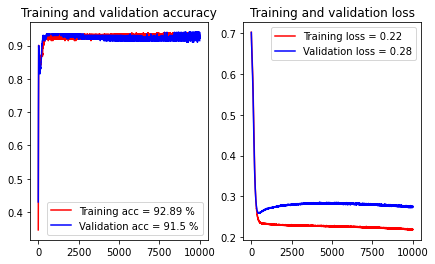

In [11]:
plot_acc_loss(history)

รูปที่ 3.4 ความแม่นยำและค่าสูญเสียจากโมเดลเส้นฐาน

สามารถสังเกตผลจากการฟิตเกินได้ในพล็อตของค่าสูญเสียทางด้านขวาของรูปที่ 3.4 
โดยขณะที่ค่าสูญเสียจากข้อมูลฝึกลดลงต่อเนื่องตามจำนวนรอบการฝึก 
ค่าสูญเสียจากข้อมูลทดสอบกลับมีแนวโน้มเพิ่มขึ้น
เมื่อพล็อตเส้นแบ่งเขตเพื่อตรวจสอบสมรรถนะการจำแนกข้อมูลจากโมเดลเส้นฐานจะได้ดังในรูปที่ 3.5


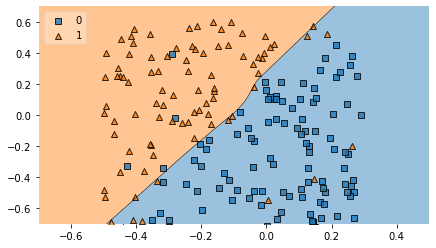

In [12]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model, legend=2)
plt.xlim([-0.7,0.5])
plt.ylim([-0.7,0.7])
plt.show()

รูปที่ 3.5 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลเส้นฐาน

การทำเรกูลาร์ไรเซชันกับชั้นแฝงของโมเดลโดยไลบรารี TF มีตัวเลือกมากกว่าเนื้อหาที่อธิบาย 
เช่นนอกจากจะเลือกชนิด L1, L2 แล้วยังสามารถทำกับค่าน้ำหนัก ค่าเบี่ยงเบน หรือฟังก์ชันกระตุ้นก็ได้ 
ในตัวอย่างนี้เราจะเลือกทำกับค่าน้ำหนักโดยตัวเลือก kernel_regularizer สร้างโมเดล model_L2 ดังนี้ 
(ปรับค่าพารามิเตอร์ $\lambda$ ตามต้องการ)

In [13]:
from tensorflow.keras.regularizers import L2

In [14]:
model_L2 = Sequential([
    Flatten(input_shape=[2]),
    Dense(20, kernel_regularizer=L2(0.01), activation='relu'),
    Dense(30, kernel_regularizer=L2(0.01), activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

คอมไพล์และฝึกจำนวน 10,000 รอบเท่ากับโมเดลเส้นฐาน

In [15]:
model_L2.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history_L2 = model_L2.fit(train_X, train_Y, epochs=10000,batch_size=None, validation_data=(test_X,test_Y),verbose=0)

พล็อตความแม่นยำจากชุดข้อมูลฝึกและทดสอบดังแสดงในรูปที่ 3.6

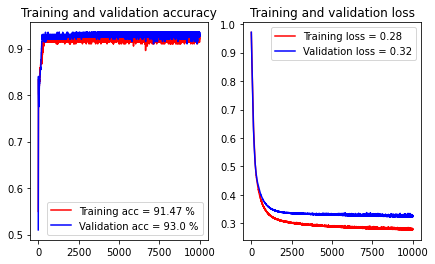

In [17]:
plot_acc_loss(history_L2)

รูปที่ 3.6 ความแม่นยำและค่าสูญเสียจากโมเดลเรกูลาร์ไรเซชัน L2



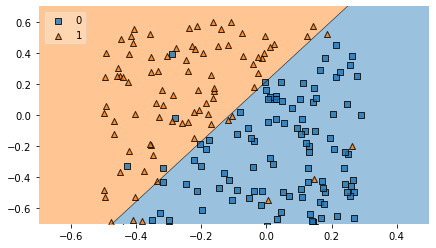

In [18]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model_L2, legend=2)
plt.xlim([-0.7,0.5])
plt.ylim([-0.7,0.7])
plt.show()

รูปที่ 3.7 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลเรกูลาร์ไรเซชัน L2

ค่าของความแม่นยำและค่าสูญเสียอาจแตกต่างกันไปเล็กน้อยในแต่ละครั้งของการรัน แต่สิ่งที่สังเกตได้คือเส้นขอบเขตในรูปที่ 3.7 
จากโมเดลที่มีการเรกูลาร์ไรเซชันจะมีลักษณะเข้าใกล้เส้นตรงมากกว่า แสดงถึงโมเดลมีการฟิตเกินน้อยกว่า 

### 3.2.2 วิธีการดรอปเอาต์

การลดการฟิตเกินอีกวิธีหนึ่งที่ใช้ได้ผลดีคือ ดรอปเอาต์ (dropout) แนวคิดคือต้องการกระจายค่านำ้หนักโดยไม่ขึ้นกับลักษณะเด่น
ของอินพุตตัวอย่างใดมากเกินไป อธิบายได้โดยดูรูปที่ 3.8 ประกอบ สมมุติว่าโครงข่ายในรูปด้านบนซ้ายคือโมเดลที่ต้องการฝึก
ในแต่ละตัวอย่างข้อมูลการฝึกจะตัดเซลล์ในแต่ละชั้นออกแบบสุ่มตามสัดส่วนที่กำหนด เช่น 30%, 50% พร้อมขจัดการเชื่อมต่อที่เป็นอินพุตและเอาต์พุตของเซลล์นั้น 
ตัวอย่างเซลล์และเส้นทางที่ถูกตัดออกแสดงโดยเส้นประ ผลคือจะได้โครงข่ายขนาดเล็กลง สังเกตว่าตำแหน่งที่ตัดเซลล์ออกจะไม่คงที่ 
เพราะเมื่อประมวลผลตัวอย่างข้อมูลใหม่ก็จะเลือกเซลล์ที่ถูกตัดออกตำแหน่งใหม่แบบสุ่ม 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1EBQHzY354lMR25n3Ptzf22IjxMzLzQg7" width=750 />
</p>
<div align="center">รูปที่ 3.8 หลักการของวิธีการดรอปเอาต์</div>

ในการอิมพลิเมนต์ดรอปเอาต์ วิธีหนึ่งที่นิยมใช้คือดรอปเอาต์ผกผัน (inverted dropout) ในกรณีที่สร้างโมเดลจากโค้ดไพธอนดังเช่นในบทที่ 
2 สมมุติว่าต้องการตัดเซลล์ในชั้น $l = 3$ สร้างเมทริกซ์ d3 โดยคำสั่ง
```python
d3 = np.random.rand(a3.shape[0],a3.shape[1]) < keep_prob
```
สังเกตว่า d3 มีขนาดเท่ากับ a3 และมีค่าขึ้นกับเงื่อนไขเปรียบเทียบค่าสุ่มที่กำเนิดจาก np.random.rand() กับตัวแปร 
keep_prob ซึ่งคือค่าสัดส่วนของเซลล์ที่ยังคงอยู่ตามที่เรากำหนด ตัวอย่างเช่นหากต้องการรักษาเซลล์ไว้ 80% 
(หรือตัดเซลล์ทิ้งไป 20%) ตั้งค่า keep_prob = 0.8 จากนั้นคำนวณเอาต์พุตจากฟังก์ชันกระตุ้นในชั้นที่ 3 ดังนี้
```python
a3 = np.multiply(a3,d3)
```
เป็นการคูณค่าเอาต์พุต a3 เดิมกับ d3 แบบสมาชิกต่อสมาชิก (คำสั่งทำงานได้ถึงแม้ว่าค่าใน d3 เป็นตรรกะ true/false)
สุดท้ายคือการปรับมาตราส่วนเพื่อชดเชยเซลล์ที่ถูกตัดทิ้งไป เพื่อทำให้ค่าคาดหมายของ a3 คงเดิม
```python
a3 /= keep_prob
```
จุดสำคัญหนึ่งของวิธีการดรอปเอาต์คือ เราจะไม่ใช้ดรอปเอาต์ในขั้นตอนการพยากรณ์ข้อมูลทดสอบ 
เพราะจะเป็นเสมือนสร้างการรบกวนในการพยากรณ์ซึ่งไม่เป็นผลดี 

**ตัวอย่าง 3.2**

ในการสร้างโมเดลโดยไลบรารี TF สามารถกำหนดชั้นดรอปเอาต์แทรกในโครงข่ายได้โดยง่าย โดยใส่อาร์กิวเมนต์ 
rate ค่าในช่วง 0-1 เป็นอัตราส่วนของเซลล์ที่ต้องการตัดทิ้ง (ตรงกันข้ามกับตัวแปร keep_prob ที่อธิบายด้านบน) 
ทดลองใช้ดรอปเอาต์เพื่อเปรียบเทียบกับโมเดลเส้นฐานและวิธีเรกูลาร์ไรเซชันในตัวอย่าง 3.1 รูปที่ 3.9 และ 3.10 
แสดงผลที่ได้จากวิธีดรอปเอาต์ซึ่งจะเห็นว่าสามารถลดผลจากการฟิตเกินได้

In [19]:
from tensorflow.keras.layers import Dropout

In [20]:
model_DO = Sequential([
    Flatten(input_shape=[2]),
    Dense(20, activation='relu'),
    Dropout(0.5),
    Dense(30, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

In [21]:
model_DO.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history_DO = model_DO.fit(train_X, train_Y, epochs=10000, batch_size=None,validation_data=(test_X,test_Y),verbose=0)

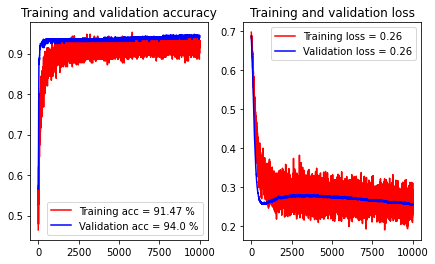

In [23]:
plot_acc_loss(history_DO)

รูปที่ 3.9 ความแม่นยำและค่าสูญเสียจากโมเดลดรอปเอาต์

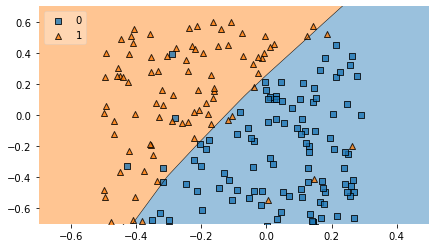

In [24]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model_DO, legend=2)
plt.xlim([-0.7,0.5])
plt.ylim([-0.7,0.7])
plt.show()

รูปที่ 3.10 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลดรอปเอาต์

### 3.2.3 การแก้ปัญหาฟิตเกินรูปแบบอื่น

ในหัวข้อย่อยนี้จะกล่าวถึงวิธีการแก้ปัญหาฟิตเกินที่นอกเหนือจากการทำเรกูลาร์ไรเซชันและดรอปเอาต์ แนวทางแรกคือการเพิ่มข้อมูลฝึก
หลักการของการเรียนรู้เชิงลึกคือการขับเคลื่อนโดยข้อมูล ในกรณีที่ไม่สามารถหาข้อมูลใหม่มาเพิ่มเติมได้ เราสามารถที่จะใช้การแต่งเติมข้อมูล (data augmentation) 
กับข้อมูลเดิมที่มีอยู่เพื่อเพิ่มความหลากหลายให้กับข้อมูลฝึก ตัวอย่างเช่นในการจำแนกภาพสุนัขและแมว 
อาจจะใช้โปรแกรมด้านการประมวลผลภาพเพื่อกลับองค์ประกอบจากซ้ายมาขวา (เหมือนมองผ่านกระจกเงา) ขยาย ย่อ หรือหมุนภาพ ไลบรารี TF 
มีฟังก์ชันสนับสนุนเพื่อช่วยในการแต่งเติมข้อมูลฝึกได้โดยง่าย

อีกวิธีการหนึ่งที่สามารถลดการฟิตเกินได้โดยไม่ต้องแก้ไขโมเดลหรือข้อมูลคือการตรวจสอบค่าสูญเสียของชุดข้อมูลฝึกและชุดข้อมูลทดสอบในระหว่างการฝึก 
และหยุดการฝึกเมื่อค่าสูญเสียของชุดข้อมูลทดสอบมีแนวโน้มเพิ่มขึ้นแม้ว่าค่าสูญเสียของชุดข้อมูลฝึกยังลดลงดังแสดงในรูปที่ 3.11 
เพราะการฝึกโมเดลต่อไปหลังจากจุดนี้ทำให้เกิดการฟิตเกิน หากใช้ไลบรารี TF เราสามารถกำหนดฟังก์ชันเรียกกลับเพื่อหยุดการฝึกได้โดยง่าย

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=19rXgC5tWMa4H0bWAvgRCTcMzS5PvrTm9" width=550 />
</p>
<div align="center">รูปที่ 3.11 วิธีการหยุดฝึกตั้งแต่ช่วงต้น</div>

**ตัวอย่าง 3.3**

จากโมเดลเส้นฐานในตัวอย่าง 3.1 ต้องการใช้ฟังก์ชันเรียกกลับเพื่อหยุดการฝึกเมื่อค่าสูญเสียจากชุดข้อมูลทดสอบมีแนวโน้มเพิ่มขึ้น 
ในทางปฏิบัติค่าสููญเสียอาจมีการรบกวนทำให้มีค่าเปลี่ยนแปลงขึ้นลงไม่สม่ำเสมอ ดังนั้นต้องมีการกรองการกระเพื่อมดังกล่าว

นำเข้าฟังก์ชัน EarlyStopping ได้ดังนี้

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

สร้างและคอมไพล์โมเดลเส้นฐานโดยใช้คำสั่งเช่นเดียวกับในตัวอย่าง 3.1

In [26]:
model_ES = Sequential([
    Flatten(input_shape=[2]),
    Dense(20, activation='relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_ES.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

เขียนโค้ดเพื่อสร้างฟังก์ชันเรียกกลับเป็น EarlyStopping() ใส่อาร์กิวเมนต์เพื่อเฝ้าสังเกตค่าสูญเสีย val_loss และตั้งค่า 
patience เพื่อกำหนดว่าจะหยุดการฝึกเมื่อค่าสูญเสียเพิ่มขึ้นเป็นจำนวนกี่รอบ 

In [27]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5)

ฝึกโมเดลโดยตั้ง callbacks เป็น [early_stopping] (ต้องอยู่ในวงเล็บสี่เหลี่ยมเนื่องจากอาจมีการเรียกกลับหลายฟังก์ชัน) 

In [28]:
history_ES = model_ES.fit(train_X, train_Y, epochs=10000,batch_size=None,validation_data=(test_X,test_Y),callbacks=[early_stopping])

Epoch 1/10000
7/7 [==============================] - 0s 17ms/step - loss: 0.6795 - accuracy: 0.6825 - val_loss: 0.6758 - val_accuracy: 0.7350
Epoch 2/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.6825 - val_loss: 0.6742 - val_accuracy: 0.7750
Epoch 3/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.7346 - val_loss: 0.6727 - val_accuracy: 0.7750
Epoch 4/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.6758 - accuracy: 0.7583 - val_loss: 0.6713 - val_accuracy: 0.7700
Epoch 5/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.7536 - val_loss: 0.6698 - val_accuracy: 0.7700
Epoch 6/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.7488 - val_loss: 0.6684 - val_accuracy: 0.7700
Epoch 7/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.6720 - accuracy: 0.7488 - val_loss: 0.6670 - val_accuracy: 0.7700
Epoch 8/1000

Epoch 59/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.5843 - accuracy: 0.8294 - val_loss: 0.5698 - val_accuracy: 0.8000
Epoch 60/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.5821 - accuracy: 0.8294 - val_loss: 0.5674 - val_accuracy: 0.8000
Epoch 61/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.8294 - val_loss: 0.5651 - val_accuracy: 0.8000
Epoch 62/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.8246 - val_loss: 0.5626 - val_accuracy: 0.8000
Epoch 63/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.8294 - val_loss: 0.5605 - val_accuracy: 0.8000
Epoch 64/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.5735 - accuracy: 0.8294 - val_loss: 0.5582 - val_accuracy: 0.8050
Epoch 65/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.5713 - accuracy: 0.8294 - val_loss: 0.5559 - val_accuracy: 0.8050
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8720 - val_loss: 0.3421 - val_accuracy: 0.8950
Epoch 174/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.3491 - accuracy: 0.8720 - val_loss: 0.3408 - val_accuracy: 0.9000
Epoch 175/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.3480 - accuracy: 0.8720 - val_loss: 0.3395 - val_accuracy: 0.9000
Epoch 176/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8720 - val_loss: 0.3384 - val_accuracy: 0.9000
Epoch 177/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8768 - val_loss: 0.3372 - val_accuracy: 0.9000
Epoch 178/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8720 - val_loss: 0.3362 - val_accuracy: 0.9000
Epoch 179/10000
7/7 [==============================] - 0s 4ms/step - loss: 0.3426 - accuracy: 0.8673 - val_loss: 0.3352 - val_accuracy: 0.9000
Epoch 180/10000

7/7 [==============================] - 0s 3ms/step - loss: 0.2625 - accuracy: 0.9194 - val_loss: 0.2695 - val_accuracy: 0.9200
Epoch 288/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.9194 - val_loss: 0.2693 - val_accuracy: 0.9200
Epoch 289/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.9194 - val_loss: 0.2690 - val_accuracy: 0.9200
Epoch 290/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.2613 - accuracy: 0.9194 - val_loss: 0.2688 - val_accuracy: 0.9200
Epoch 291/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.9194 - val_loss: 0.2686 - val_accuracy: 0.9200
Epoch 292/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.2614 - accuracy: 0.9194 - val_loss: 0.2684 - val_accuracy: 0.9200
Epoch 293/10000
7/7 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.9194 - val_loss: 0.2682 - val_accuracy: 0.9200
Epoch 294/10000

ตรวจสอบจากเอาต์พุตจะพบว่ามีการหยุดฝึกเมื่อผ่านไปได้เพียง 409 รอบ (การรันแต่ละครั้งอาจได้ค่าที่แตกต่างกัน) 
พล็อตค่าความแม่นยำ ค่าสูญเสีย และผลการจำแนกข้อมูลได้ดังรูปที่ 3.12, 3.13 
จะเห็นว่ามีผลคล้ายกับการทำเรกูลาร์ไรเซชันหรือดรอปเอาต์ คือสามารถลดการฟิตเกินลงได้

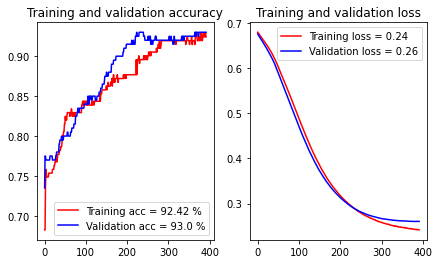

In [29]:
plot_acc_loss(history_ES)

รูปที่ 3.12 ความแม่นยำและค่าสูญเสียจากโมเดลที่หยุดการฝึกตั้งแต่ช่วงต้น

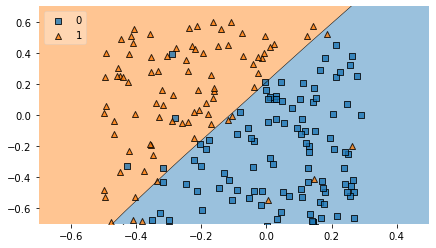

In [30]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model_ES, legend=2)
plt.xlim([-0.7,0.5])
plt.ylim([-0.7,0.7])
plt.show()

รูปที่ 3.13 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลที่หยุดการฝึกตั้งแต่ช่วงต้น

## 3.3 การเตรียมข้อมูลและตั้งค่าพารามิเตอร์

ในหัวข้อนี้จะกล่าวถึงวิธีการปรับปรุงข้อมูลก่อนเริ่มผึกและการตั้งค่าน้ำหนักเพื่อช่วยในการฝึกโมเดลได้ดีขึ้น  

### 3.3.1 การทำอินพุตให้เป็นบรรทัดฐาน

ข้อสังเกตหนึ่งของอินพุตในระนาบ 2 มิติที่ใช้ในตัวอย่าง 3.1 - 3.3 คือทั้งสองแกนมีค่าเฉลี่ยเข้าใกล้ศูนย์ 
และความแปรปรวนประมาณใกล้เคียงกัน ซึ่งเป็นคุณสมบัติที่ช่วยในการลดค่าเกรเดียนต์ของฟังก์ชันมูลค่า 
คือทำให้สามารถใช้อัตราการเรียนรู้ที่มีค่ามากขึ้น ดังนั้นในกรณีทั่วไปที่อินพุตอาจมีค่าเฉลี่ยและความแปรปรวนแตกต่างกัน 
วิธีหนึ่งที่ช่วยลดเวลาการฝึกลงได้คือการทำอินพุตให้เป็นบรรทัดฐาน 
(normalizing) 
$$
\tilde{x} = \frac{x - \mu}{\sigma} \tag{3.7}
$$
โดยค่าเฉลี่ย $\mu$ และความแปรปรวน $\sigma$ คำนวณได้จาก
$$
\mu = \frac{1}{m}\sum_{i=1}^mx^{(i)} \tag{3.8}
$$
$$
\sigma^2 = \frac{1}{m}\sum_{i=1}^m(x^{(i)}-\mu)^2 \tag{3.9}
$$

### 3.3.2 การกำหนดค่าเริ่มต้นของพารามิเตอร์

การกำหนดค่าเริ่มต้นของเมทริกซ์ค่าน้ำหนัก $W$ ที่เหมาะสมมีความสำคัญอย่างยิ่งต่อการฝึกโมเดลในการเรียนรู้เชิงลึก 
สิ่งที่ต้องคำนึงอย่างแรกคือไม่สามารถกำหนด $W = 0$ เป็นค่าเริ่มต้นได้ เพราะจะเกิดปัญหาจากความสมมาตร 
(แตกต่างจากค่าเอนเอียง $b$ ที่สามารถตั้งค่าเริ่มต้นเป็นศูนย์ได้) ค่าของ $W$ ต้องเป็นค่าสุ่มเพื่อไม่ให้เกิดความสมมาตรของโครงข่าย

**ตัวอย่าง 3.4**

สำหรับตัวอย่างในหัวข้อย่อยนี้จะเป็นปัญหาการจำแนกทวิภาคโดยใช้ข้อมูลจากไลบรารี sklearn ที่มีลักษณะเป็นวงกลมซ้อนกัน 
เขียนฟังก์ชัน load_circles_dataset() และเรียกใช้ฟังก์ชันที่จะพล็อตจุดข้อมูลดังในรูปที่ 3.14

In [4]:
def load_circles_dataset():
    np.random.seed(1)
    train_X, train_Y = sklearn.datasets.make_circles(n_samples=300, noise=.05)
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_circles(n_samples=100, noise=.05)
    train_Y = train_Y[:,np.newaxis]
    test_Y = test_Y[:,np.newaxis]
    
    # Visualize the data
    for i in range(len(train_Y)):
        if train_Y[i,0] == 1:
            plt.scatter(train_X[i,0],train_X[i,1],c='orange', marker='^',s=40)
        else:
            plt.scatter(train_X[i,0],train_X[i,1],c='blue', marker='s',s=40)    
    
    return train_X, train_Y, test_X, test_Y

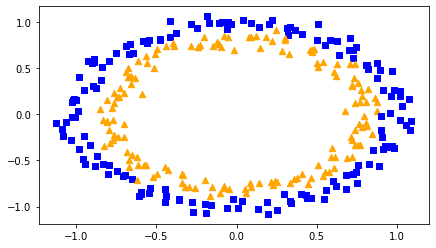

In [6]:
train_X, train_Y, test_X, test_Y = load_circles_dataset()

รูปที่ 3.14 ชุดข้อมูลสองประเภทที่เรียงตัวเป็นวงกลมซ้อนกัน

ในตัวอย่างนี้ต้องการแสดงว่าหากกำหนดค่าเริ่มต้นของค่าน้ำหนักเป็นศูนย์จะทำให้ไม่สามารถฝึกโมเดลให้เรียนรู้ได้เนื่องจากปัญหาการสมมาตร 
การสร้างโมเดลโดยไลบรารี TF สามารถกำหนดการตั้งค่าเริ่มต้นในแต่ละชั้นได้โดยใช้อาร์กิวเมนต์ kernel_initilizer และ bias_initializer 
สำหรับค่าน้ำหนัก $W$ และค่าเอนเอียง $b$ ตามลำดับ ตัวอย่างนี้จะทดลองกำหนดให้เป็นศูนย์ทั้งหมด

In [54]:
model0 = Sequential([
    Flatten(input_shape=[2]),
    Dense(10, kernel_initializer='zeros',bias_initializer='zeros', activation='relu'),
    Dense(5, kernel_initializer='zeros',bias_initializer='zeros', activation = 'relu'),
    Dense(1, kernel_initializer='zeros',bias_initializer='zeros', activation = 'sigmoid')
])

คอมไพล์และฝึกโมเดลเป็นจำนวน 2,000 รอบ 

In [55]:
model0.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
history0 = model0.fit(train_X, train_Y, epochs=2000, validation_data=(test_X,test_Y),verbose=0)

เมื่อพล็อตค่าความแม่นยำและค่าสูญเสียจะได้ดังรูปที่ 3.15 จะเห็นได้ว่าค่าความแม่นยำและค่าสูญเสียไม่มีแนวโน้มในทิศทางดีขึ้นเมื่อผ่านการฝึกตามจำนวนรอบ 
ดังนั้นจึงคาดเดาได้ว่าโมเดลไม่สามารถจำแนกประเภทข้อมูลได้ ยืนยันได้จากพล็อตในรูปที่ 3.16 ซึ่งไม่มีการแสดงเส้นแบ่งเขตในการจำแนกประเภท 

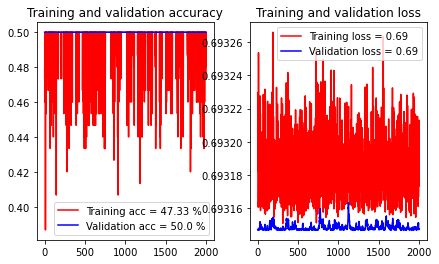

In [58]:
plot_acc_loss(history0)

รูปที่ 3.15 ค่าความแม่นยำและค่าสูญเสียจากการฝึกเมื่อกำหนดค่าเริ่มต้น $W = 0$

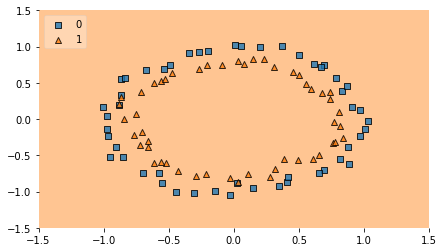

In [59]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model0, legend=2)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.show()

รูปที่ 3.16 ผลการจำแนกข้อมูลของโมเดลที่กำหนดค่าเริ่มต้น $W = 0$

จากตัวอย่างที่ผ่านมาสรุปได้ว่าจะต้องตั้งค่าเริ่มต้นของน้ำหนักเป็นค่าสุ่มเพื่อไม่ให้เกิดปัญหาสมมาตร 
ประเด็นต่อมาคือหากกำหนดค่าเริ่มต้นของ $W$ ไม่เหมาะสมจะเกิดกรณีที่เรียกว่า การสูญหาย (vanishing) หรือการเพิ่มสูง 
(explode) ของค่าเกรเดียนต์ โดยเฉพาะเมื่อโมเดลมีความลึกมาก คือมีจำนวนชั้นแฝงมาก ผลคือการฝึกจะใช้เวลานานและไม่ได้ผลดี 

**ตัวอย่าง 3.5**

ในตัวอย่างนี้จะทดลองกับข้อมูลเดิมในตัวอย่างที่ผ่านมา โดยตั้งค่าเริ่มต้นของน้ำหนักเป็นค่าสุ่มในช่วง 0.0 - 10.0 ส่วนค่าเอนเอียงสามารถตั้งให้เป็นศูนย์ได้ 
คอมไพล์และฝึกโมเดลจำนวน 2,000 รอบเท่าเดิม 

In [60]:
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=10)

In [61]:
model1 = Sequential([
    Flatten(input_shape=[2]),
    Dense(10, kernel_initializer=initializer,bias_initializer='zeros', activation='relu'),
    Dense(5, kernel_initializer=initializer,bias_initializer='zeros', activation = 'relu'),
    Dense(1, kernel_initializer=initializer,bias_initializer='zeros', activation = 'sigmoid')
])

In [62]:
model1.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history1 = model1.fit(train_X, train_Y, epochs=2000, validation_data=(test_X,test_Y),verbose=0)

เมื่อพล็อตความแม่นยำและค่าสูญเสียในรูปที่ 3.17 จะเห็นว่าหลังจากฝึก 2,000 รอบ โมเดลสามารถเรียนรู้ได้ในระดับหนึ่ง 
แต่ค่าความแม่นยำยังไม่เป็นที่น่าพอใจ สามารถตรวจสอบผลการจำแนกได้ดังในรูปที่ 3.18

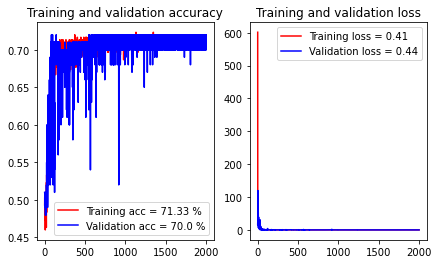

In [64]:
plot_acc_loss(history1)

รูปที่ 3.17 ค่าความแม่นยำและค่าสูญเสียจากการฝึกเมื่อกำหนดค่าเริ่มต้น $W \in [0,10]$

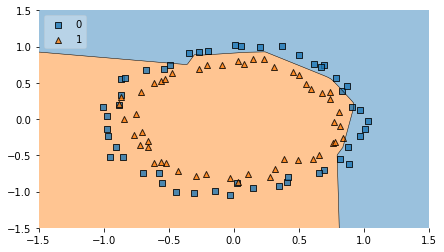

In [65]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model1, legend=2)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.show()

รูปที่ 3.18 ผลการจำแนกข้อมูลของโมเดลที่กำหนดค่าเริ่มต้น $W \in [0,10]$

จากตัวอย่างที่ผ่านมาจะเห็นว่าค่าเริ่มต้นของ $W$ มีผลต่อการฝึกโมเดล 
เราต้องการกำหนดค่าที่เหมาะสมเพื่อมิให้เกิดปัญหาการสูญหายหรือการเพิ่มสูงของค่าเกรเดียนต์ ซึ่งไลบรารี TF 
มีตัวเลือกให้หลายรูปแบบตามที่มีผู้นำเสนอในบทความ

เพื่อให้เข้าใจได้ง่ายขึ้น พิจารณาเอาต์พุตที่เป็นผลรวมเชิงเส้นของอินพุตกับค่าน้ำหนัก
$$
z = w_1x_1 + w_2x_2 + \ldots + w_nx_n \tag{3.10}
$$

หากต้องการให้เอาต์พุตมีค่าในช่วงที่เหมาะสม เมื่อจำนวน $n$ มากขึ้นจะต้องการให้ค่าน้ำหนักลดลง 
ดังนั้นนอกจากเลือกค่าของ $W$ เป็นค่าสุ่มแล้ว จะปรับมาตราส่วนค่าเริ่มต้นขึ้นกับ $n$ แนวคิดที่มีผู้นำเสนอคืิอ 
กำหนดค่าความแปรปรวนของ $W$
$$
Var(w_i) = \frac{1}{n} \tag{3.11}
$$ 
เมื่อฟังก์ชันกระตุ้นเป็นแบบ $tanh$ มีชื่อเรียกว่า "Xavier initialization" ตามชื่อผู้เสนอในบทความ 

ส่วนกรณีฟังก์ชันกระตุ้นเป็นแบบ ReLU จะกำหนด
$$
Var(w_i) = \frac{2}{n} \tag{3.12}
$$ 
เรียกว่า "He initialization" ตามชื่อผู้เสนอ 
สังเกตว่าหากเป็นชั้นที่ $l$ ค่าของ $W^{[l]}$ จะถูกตั้งให้มีความแปรปรวน$\frac{1}{n^{[l-1]}}$ (Xavier) หรือ 
$\frac{2}{n^{[l-1]}}$ (He) ถ้าเขียนโค้ดไพธอนเองจะมีลักษณะดังนี้
```python
W_l = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(1./layers_dims[l-1]) # Xavier
W_l = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1]) # He
```

**ตัวอย่าง 3.6**

จากข้อมูลเดิมในตัวอย่างก่อนหน้านี้ ทดลองตั้งค่าเริ่มต้น $W$ โดยกำหนดค่าความแปรปรวนแบบ He ทำได้โดยตั้ง initializer เป็นแบบ HeNormal()

In [43]:
he_initializer = tf.keras.initializers.HeNormal()

In [49]:
model2 = Sequential([
    Flatten(input_shape=[2]),
    Dense(10, kernel_initializer=he_initializer,bias_initializer='zeros', activation='relu'),
    Dense(5, kernel_initializer=he_initializer,bias_initializer='zeros', activation = 'relu'),
    Dense(1, kernel_initializer=he_initializer,bias_initializer='zeros', activation = 'sigmoid')
])

ฝึกโมเดลด้วยจำนวนรอบเท่าเดิม ตรวจสอบความแม่นยำและค่าสูญเสีย (รูปที่ 3.19) รวมถึงพล็อตขอบเขตการจำแนก (รูปที่ 3.20) 
จะพบว่าได้โมเดลที่พยากรณ์ได้แม่นยำขึ้น

In [50]:
model2.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
history2 = model2.fit(train_X, train_Y, epochs=2000, validation_data=(test_X,test_Y),verbose=0)

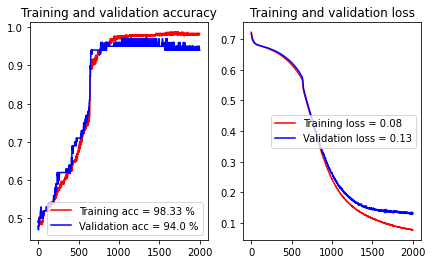

In [52]:
plot_acc_loss(history2)

รูปที่ 3.19 ค่าความแม่นยำและค่าสูญเสียจากการฝึกเมื่อกำหนดค่าเริ่มต้นของ $W$ แบบ HeNormal()

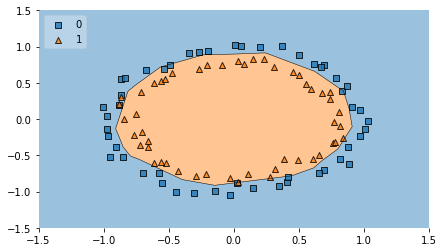

In [53]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model2, legend=2)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.show()

รูปที่ 3.20 ผลการจำแนกข้อมูลของโมเดลที่ตั้งค่า $W$ โดยตัวเลือก HeNormal()

## 3.4 ขั้นตอนวิธีหาค่าเหมาะที่สุด

ตั้งแต่บทที่ 2 เราได้อธิบายวิธีลดค่าเกรเดียนต์ ซึ่งเป็นวิธีการพื้นฐานในการปรับค่าน้ำหนักในทิศทางเข้าสู่ค่าต่ำสุดของฟังก์ชันมูลค่า 
ในเวลาต่อมาได้มีการนำเสนอขั้นตอนวิธีที่ปรับปรุงให้ทำงานดีขึ้น รวมถึงการจัดข้อมูลเป็นกลุ่มเพื่อลดเวลาการฝึก 
ในหัวข้อนี้จะกล่าวถึงขั้นตอนวิธีหาค่าเหมาะที่สุดประเภทต่างๆ ที่สามารถเลือกได้จากไลบรารี TF และการฝึกโดยแบ่งกลุ่มข้อมูล

### 3.4.1 การแบ่งข้อมูลเป็นกลุ่มย่อย

งานด้านการเรียนรู้เชิงลึกมักเกี่ยวข้องกับชุดข้อมูลขนาดใหญ่ เป็นผลทำให้ต้องฝึกโมเดลเป็นเวลานานมากเมื่อใช้ขั้นตอนวิธีลดค่าเกรเดียนต์มาตรฐาน 
ถึงแม้ว่าการคำนวณเชิงเวกเตอร์จะช่วยลดเวลาในการประมวลผลลงได้ แต่สำหรับกรณีที่ตัวอย่างข้อมูลมีจำนวนมาก เช่น แปดล้านตัวอย่าง 
เราจะต้องประมวลผลสิบล้านตัวอย่างข้อมูลก่อนที่จะคำนวณหนึ่งขั้นของการลดค่าเกรเดียนต์ 

เราสามารถลดเวลาฝึกโมเดลได้โดยแบ่งข้อมูลทั้งหมดเป็นกลุ่มย่อย เรียกว่ากลุ่มเล็ก (mini-batch) 
ซึ่งอาจเป็นจำนวนเท่าไรก็ได้ขึ้นกับว่าชุดข้อมูลทั้งหมดมีมากน้อยเพียงใด ในทางปฏิบัตินิยมเลือกจำนวนเป็นค่ายกกำลังของฐานสอง 
แต่เพื่อความเข้าใจง่ายจะยกตัวอย่างว่าเลือกจำนวนข้อมูลในกลุ่มเล็กหนึ่งเท่ากับ 2,000 ตัวอย่าง
ดังนั้นข้อมูลทั้งหมด 8,000,000 ตัวอย่างจะถูกแบ่งได้เป็น 4,000 กลุ่มเล็ก 
สัญกรณ์ที่จะใช้แสดงหมายเลขกลุ่มคือเลขยกกำลังภายในวงเล็บปีกกา 
เช่นกลุ่มเล็กของอินพุต $X^{\{1\}},X^{\{2\}}, \ldots, X^{\{4000\}}$ และเลเบล $ํY^{\{1\}},Y^{\{2\}}, \ldots, Y^{\{4000\}}$

**หมายเหตุ :** ต้องไม่สับสนกับสัญกรณ์เลขยกกำลังในวงเล็บประเภทอื่นที่ใช้ก่อนหน้านี้ คือ $x^{(i)} $ แทนอินพุตตัวอย่างที่ $i$ 
 และ $a^{[l]}$ แทนเอาต์พุตของชั้นที่ $l$

โดยวิธีการแบ่งกลุ่มข้อมูลนี้ ขั้นตอนวิธีลดค่าเกรเดียนต์ปกติอาจถูกเรียกเต็มว่า การลดค่าเกรเดียนต์แบบกลุ่ม (batch) ซึ่งหมายถึงกลุ่มข้อมูลทั้งชุด 
ส่วนกรณีสุดทางอีกด้านหนึ่งคือเลือกขนาดข้อมูลในกลุ่มเล็กเท่ากับหนึ่งถูกเรียกว่า การลดค่าเกรเดียนต์แบบสโทแคสติก (stochastic) 
รูปที่ 3.21 เปรียบเทียบขั้นการลดค่าเกรเดียนต์ระหว่างกรณีทั้งสอง 
จะเห็นว่าวิธีแบบกลุ่มทางด้านซ้ายมีทิศทางในการลดค่าเกรเดียนต์ลงอย่างต่อเนื่อง (เมื่อเลือกขนาดของขั้นไม่ใหญ่เกินไป) แต่จะใช้เวลานาน
ส่วนวิธีแบบสโทแคสติกที่ใช้เวลาน้อยกว่าจะมีการแกว่งของทิศทางค่อนข้างมากแม้จะมีแนวโน้มสู่ค่าต่ำสุด 
และเมื่อเวลาผ่านไปจะไม่เข้าสู่ค่าต่ำสุดอย่างสมบูรณ์แต่จะวนเวียนอยู่โดยรอบ ในทางปฏิบัติมักเลือกทางสายกลาง คือแบ่งข้อมูลเป็นกลุ่มเล็กมากกว่า 
1 แต่ไม่เท่ากับกลุ่มข้อมูลทั้งหมด (เว้นแต่ว่าชุดข้อมูลทั้งหมดมีขนาดไม่ใหญ่มาก) 
อีกเหตุผลหนึ่งที่ไม่ควรเลือกวิธีสโทแคสติกคือเราจะเสียสมรรถนะการคำนวณเชิงเวกเตอร์ไป เพราะในหนึ่งลูปจะประมวลผลข้อมูลเพียงตัวอย่างเดียว

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1WPIif-YhJ9zvYvcQikL23YT2wStK41Nk" width=550 />
</p>
<div align="center">รูปที่ 3.21 เปรียบเทียบการลดค่าเกรเดียนต์ระหว่างวิธีแบบกลุ่มกับวิธีสโทแคสติก</div>

ไลบรารี TF สนับสนุนการแบ่งกลุ่มข้อมูลโดยมีตัวเลือก batch_size ที่กำหนดได้ใน model.fit() หากไม่มีการกำหนดจะใช้ค่าโดยปริยาย 
คือ 32 ถ้าต้องการให้กลุ่มเท่ากับข้อมูลทั้งชุดให้กำหนด batch_size = None 
เนื่องจากตัวอย่างในบทนี้ใช้ข้อมูลขนาดเล็กจึงไม่เห็นผลที่ชัดเจนจากการแบ่งกลุ่มข้อมูล

### 3.4.2 วิธีโมเมนตัม

จากหัวข้อย่อยที่ผ่านมาจะเห็นว่าผลจากการแบ่งข้อมูลฝึกเป็นกลุ่มเล็กทำให้แต่ละขั้นของการลดค่าเกรเดียนต์มีการแกว่งมากขึ้น 
สร้างปัญหาให้กับการเลือกอัตราการเรียนรู้ที่เหมาะสม เพราะหากขั้นใหญ่เกินไปอาจทำให้ขั้นตอนวิธีไม่ลู่เข้าสู่ค่าเหมาะที่สุด 
หรือหากเล็กเกินไปก็จะใช้เวลานานหรือติดอยู่ที่ค่าต่ำสุดเฉพาะที่ (local minimum)

เพื่อความเข้าใจจะยกตัวอย่างที่ทำให้ง่ายขึ้นดังรูปที่ 3.22 โดยสมมุติว่าพารามิเตอร์อยู่ในระนาบ 2 มิติและมีค่าต่ำสุดที่ศูนย์กลางของคอนทัวร์ 
ลูกศรแสดงค่าของพารามิเตอร์ที่ถูกปรับในแต่ละขั้น สังเกตได้ว่าค่ามีการแกว่งค่อนข้างมากในแกนที่ตั้งฉากกับแนวโน้มเข้าสู่คำต่ำสุด 
แนวคิดคือต้องการใช้อัตราการเรียนรู้ที่แตกต่างกันสำหรับแต่ละแกน โดยใช้อัตราที่สูงกว่าทิศทางที่มีแนวโน้มเข้าสู่ค่าต่ำสุดอย่างสม่ำเสมอ

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1UlHqITFRCcqTUkTaZ-A4xGPdpHNwnXRb" width=450 />
</p>
<div align="center">รูปที่ 3.22 อัตราการเรียนรู้สำหรับการลดค่าเกรเดียนต์</div>

วิธีการปรับปรุงตัวหาค่าเหมาะที่สุดโดยลดผลกระทบจากการแกว่งของพารามิเตอร์อาศัยหลักการของค่าเฉลี่ยที่ให้น้ำหนักแบบเลขชี้กำลัง 
(exponentially weighted averages) เรียกโดยย่อว่า EWA ที่รวมรายละเอียดไว้ในภาคผนวก A 
วิธีแรกที่จะกล่าวถึงคือการเพิ่มโมเมนตัม (momentum)ให้กับการลดค่าเกรเดียนต์ ต่อไปจะเรียกว่าวิธีโมเมนตัมเพื่อความกระชับ 
โดยทั่วไปแล้ววิธีโมเมนตัมสามารถทำงานเร็วกว่าการลดค่าเกรเดียนต์แบบปกติ ช่วยลดเวลาในการฝึกโมเดลลงได้

จากตัวอย่างในรูปที่ 3.22 การแกว่งในทิศทางของแกนที่ตั้งฉากกับแนวโน้มสู่ค่าต่ำสุดทำให้เราไม่สามารถใช้อัตราการเรียนรู้ที่เร็วได้ 
เพราะอาจทำให้ขั้นตอนวิธีไม่เสถียร ดังนั้นจึงต้องการกรองการรบกวนนี้โดย EWA ขั้นตอนวิธีโมเมนตัมมีเค้าโครงดังนี้

* กำหนดตัวแปร $V_{dW}, V_{db}$ ที่จะใช้ปรับค่าพารามิเตอร์ $W, b$ ในแต่ละขั้น โดยตั้งค่าเริ่มต้นเป็นศูนย์

ในการวนรอบที่ $k$:
* คำนวณค่า $dW, db$ สำหรับข้อมูลกลุ่มย่อยขณะนั้น
* คำนวณการเปลี่ยนแปลงของตัวแปร $V_{dW}, V_{db}$
$$
V_{dW} = \beta_1 V_{dW} + (1 - \beta_1)dW \tag{3.13}
$$
$$
V_{db} = \beta_1 V_{db} + (1 - \beta_1)db \tag{3.14}
$$
* ปรับค่าพารามิเตอร์โดยใช้ $V_{dW}, V_{db}$ แทนค่าที่เปลี่ยนแปลงในแต่ละขั้น
$$
W := W - \alpha V_{dW} \tag{3.15}
$$
$$
b := b - \alpha V_{db} \tag{3.16}
$$

โดย $\beta_1$ คือค่าไฮเปอร์พารามิเตอร์ใหม่สำหรับวิธีโมเมนตัม ทำหน้าที่เหมือนกับ $\beta$ ในภาคผนวก A 
แต่เหตุผลที่ใช้ตัวห้อย 1 เพื่อมิให้สับสนกับไฮเปอร์พารามิเตอร์ตัวอื่นที่เพิ่มขึ้นเมื่อขยายไปยังวิธีการอื่นที่จะกล่าวถึงต่อไป
ผลของการปรับพารามิเตอร์โดยวิธีโมเมนตัมคือทำให้การแกว่งลดลงจากการใช้ค่าเฉลี่ยแทนค่าของ $dW, db$ 

สำหรับผู้ที่มีความรู้ด้านฟิสิกส์สามารถเข้าใจหลักการของวิธีโมเมนตัมได้โดยเปรียบพจน์ $dW, db$ 
กับความเร่งของลูกบอลที่ไหลลงเนินสู่จุดต่ำสุด (หากมองรูปที่ 3.22 เป็นรูปชาม 3 มิติ) และพจน์โมเมนตัม $V_{dW}, V_{db}$
เปรียบได้กับความเร็วของลูกบอล ดังนั้น $\beta_1$ เปรียบได้กับแรงเสียดทานที่จะป้องกันมิให้ลูกบอลมีความเร็วเพิ่มขึ้นโดยไร้ขีดจำกัด 

สังเกตว่าไฮเปอร์พารามิเตอร์ของวิธีโมเมนตัมจะเพิ่มเป็น 2 ตัวคืออัตราการเรียนรู้ $\alpha$ และตัวควบคุม EWA คือ $\beta_1$ 
ค่าที่นิยมใช้คือ $\beta_1 = 0.9$ และสำหรับวิธีโมเมนตัมในทางปฎิบัติมักไม่มีการแก้ไขค่าเอนเอียง
เนื่องจากไม่มีผลกระทบมากนัก

บางครั้งเราอาจพบการอิมพลิเมนต์วิธีโมเมนตัมที่แตกต่างจาก (3.13)-(3.14) เล็กน้อย คือละทิ้งตัวประกอบ $(1-\beta_1)$ 
$$
V_{dW} = \beta_1 V_{dW} + dW \tag{3.17}
$$
$$
V_{db} = \beta_1 V_{db} + db \tag{3.18}
$$
โดยวิธีการนี้ค่าของ $\alpha$ จะต้องถูกชดเชยโดยค่า $(1-\beta_1)^{-1}$ ซึ่งอาจทำให้การปรับแต่งไฮเปอร์พารามิเตอร์ยุ่งยากขึ้น 

ในการเรียกใช้วิธีโมเมนตัมสำหรับไลบรารี TF จะมีตัวเลือก momentum ในตัวหาค่าเหมาะที่สุดแบบ SGD()
ซึ่งเมื่อกำหนดค่ามากกว่าศูนย์จะเพิ่มพจน์โมเมนตัมในการปรับค่า (โจทย์ปัญหา 3-6)

### 3.4.3 วิธีการแพร่กระจายแบบรากกำลังสองเฉลี่ย

ขั้นตอนวิธีการหาค่าเหมาะที่สุดอีกรูปแบบหนึ่งที่ทำให้การลดค่าเกรเดียนต์ทำงานเร็วขึ้นคือ วิธีการแพร่กระจายแบบรากกำลังสองเฉลี่ย
(root mean square propagation) นิยมเรียกย่อว่า RMSprop 

อ้างถึงรูปที่ 3.22 เพื่อความง่ายในการอธิบายจะสมมุติว่าค่าพารามิเตอร์ในทิศทางที่มีการแกว่งคือ $b$ 
และค่าที่มีแนวโน้มเข้าสู่ศูนย์กลางของคอนทัวร์อย่างสม่ำเสมอคือ $W$ (ในความเป็นจริงจะเป็นระบบหลายมิติที่ไม่สามารถบรรยายโดยภาพได้ 
ค่าพารามิเตอร์ที่แกว่งมาก/น้อยเป็นเซ็ตย่อยของพารามิเตอร์ทั้งหมด) ดังนั้้นความต้องการคือกำหนดอัตราการเรียนรู้ต่ำในทิศทางของ 
$b$ และอัตราสูงกว่าในทิศทางของ $W$ ขั้นตอนวิธี RMSprop มีเค้าโครงดังนี้

* กำหนดตัวแปร $S_{dW}, S_{db}$ ที่จะใช้ปรับค่าพารามิเตอร์ $W, b$ ในแต่ละขั้น โดยตั้งค่าเริ่มต้นเป็นศูนย์

ในการวนรอบที่ $k$:
* คำนวณค่า $dW, db$ สำหรับข้อมูลกลุ่มย่อยขณะนั้น
* คำนวณการเปลี่ยนแปลงของตัวแปร $S_{dW}, S_{db}$
$$
S_{dW} = \beta_2 S_{dW} + (1 - \beta_2)(dW)^2 \tag{3.19}
$$
$$
S_{db} = \beta_2 S_{db} + (1 - \beta_2)(db)^2 \tag{3.20}
$$
โดย $dW^2, db^2$ คือการยกกำลังสองสำหรับแต่ละสมาชิก (element-wise) และไฮเปอร์พารามิเตอร์สำหรับวิธี 
RMSprop คือ $\beta_2$ จะใช้ตัวห้อย 2 เพื่อให้แตกต่างจากที่ใช้ในวิธีโมเมนตัม 

* ปรับค่าพารามิเตอร์โดยใช้ $dW, db$ ที่ถูกปรับมาตราส่วนโดยรากกำลังสองของ $S_{dW}, S_{db}$ 
สำหรับค่า $\epsilon$ เป็นค่าน้อยเช่น $10^{-8}$ มีไว้เพื่อป้องกันปัญหาจากการหารด้วยศููนย์
$$
W := W - \alpha \frac{dW}{\sqrt{S_{dW}}+\epsilon} \tag{3.21}
$$
$$
b := b - \alpha \frac{db}{\sqrt{S_{db}}+\epsilon}  \tag{3.22}
$$

เมื่อดูเค้าโครงแล้วคงพอเข้าใจถึงเหตุผลที่เรียกวิธีการนี้ว่า "การแพร่กระจายแบบรากกำลังสองเฉลี่ย" จากข้อสมมุติก่อนหน้านี้ 
ในทิศทางของพารามิเตอร์ $b$ ที่มีการแกว่งมากกว่า $W$ ทำให้ค่ากำลังสองของความชัน $(db)^2$ 
จะมีค่าสูงกว่า $(dW)^2$ ส่งผลให้ $S_{db}$ มีค่าสูงกว่า $S_{dW}$ 
ดังนั้นอัตราการปรับค่าพารามิเตอร์ $b$ จะต่ำกว่าอัตราการปรับค่า $W$ เนื่องจากถูกหารด้วยพจน์ $\sqrt{S_{db}}$ 
ที่มีค่าสูงกว่า $\sqrt{S_{dW}}$ 

สรุปสำหรับกรณีทั่วไป ตัวหาค่าเหมาะที่สุดแบบ RMSprop จะปรับอัตราการเรียนรู้ของพารามิเตอร์ที่มีการแกว่ง (ความชันสูง) 
ให้น้อยกว่าอัตราของพารามิเตอร์ที่เรียบ (ความชันต่ำ) 
ซึ่งจะช่วยทำให้การลดค่าเกรเดียนต์ทำได้เร็วขึ้นโดยไม่เกิดการลู่ออกของพารามิเตอร์ที่มีการแกว่งมาก

ในไลบรารี TF มีตัวหาค่าเหมาะที่สุดแบบ rmsprop ให้เลือกใช้ โดยใน model.compile() กำหนด optimizer=RMSprop 
หรือสร้างออปเจ็กในบรรทัดต่างหากเพื่อกำหนดค่าอาร์กิวเมนต์ได้ 

### 3.4.4 วิธีการ Adam

Adam มิใช่ชื่อบุคคลหรือรัสพจน์แต่เป็นขั้นตอนวิธีหาค่าเหมาะที่สุดที่อนุพัทธ์จาก "adaptive moment estimation" 
เป็นเสมือนการต่อยอดจากวิธีโมเมนตัมและ RMSprop มีเค้าโครงเป็นดังนี้

* กำหนดตัวแปร $V_{dW}, V_{db}, S_{dW}, S_{db}$ ที่จะใช้ปรับค่าพารามิเตอร์ $W, b$ ในแต่ละขั้น โดยตั้งค่าเริ่มต้นเป็นศูนย์

ในการวนรอบที่ $k$:
* คำนวณค่า $dW, db$ สำหรับข้อมูลกลุ่มย่อยขณะนั้น
* คำนวณการเปลี่ยนแปลงของตัวแปร $V_{dW}, V_{db}, S_{dW}, S_{db}$
$$
V_{dW} = \beta_1 V_{dW} + (1 - \beta_1)dW \tag{3.33}
$$
$$
V_{db} = \beta_1 V_{db} + (1 - \beta_1)db \tag{3.34}
$$
$$
S_{dW} = \beta_2 S_{dW} + (1 - \beta_2)(dW)^2 \tag{3.35}
$$
$$
S_{db} = \beta_2 S_{db} + (1 - \beta_2)(db)^2 \tag{3.36}
$$
โดย $dW^2, db^2$ คือการยกกำลังสองสำหรับแต่ละสมาชิก (element-wise) และสำหรับวิธี Adam 
จะใช้การแก้ไขค่าเอนเอียงกับ $V_{dW}, V_{db}, S_{dW}, S_{db}$ แทนด้วยตัวแปร 
$V_{dWc}, V_{dbc},S_{dWc}, S_{dbc}$
$$
V_{dWc}= \frac{V_{dW}}{(1-\beta_1^k)} \tag{3.37}
$$
$$
V_{dbc} = \frac{V_{db}}{(1-\beta_1^k)} \tag{3.38}
$$
$$
S_{dWc} = \frac{S_{dW}}{(1-\beta_2^k)} \tag{3.39}
$$
$$
S_{dbc} = \frac{S_{db}}{(1-\beta_2^k)} \tag{3.40}
$$
* ปรับค่าพารามิเตอร์โดยใช้ $V_{dWc}, V_{dbc}$ 
ที่ถูกปรับมาตราส่วนโดยรากกำลังสองของ $S_{dWc}, S_{dbc}$ 
สำหรับค่า $\epsilon$ เป็นค่าน้อยเช่น $10^{-8}$ มีไว้เพื่อป้องกันปัญหาจากการหารด้วยศููนย์
$$
W := W - \alpha \frac{V_{dWc}}{\sqrt{S_{dWc}}+\epsilon} \tag{3.41}
$$
$$
b := b - \alpha \frac{V_{dbc}}{\sqrt{S_{dbc}}+\epsilon}  \tag{3.42}
$$

จะเห็นว่าวิธีการ Adam มีไฮเปอร์พารามิเตอร์หลายตัว ค่าที่แนะนำในเบื้องต้นคือ

* อัตราการเรียนรู้ $\alpha$ ต้องมีการปรับแต่ง
* ตั้งค่า $\beta_1 = 0.9$ 
* ตั้งค่า $\beta_2 = 0.999$ 
* กำหนด $\epsilon = 10^{-8}$ (ค่านี้ไม่มีผลมากนักกับสมรรถนะ)

**ตัวอย่าง 3.7**

ต้องการทดลองใช้ขั้นตอนวิธีหาค่าเหมาะที่สุด 3 แบบกับข้อมูลที่มีให้ในไลบรารี sklearn คือ moons 
เป็นการจำแนกทวิภาคจุดข้อมูลที่มีลักษณะเหมือนจันทร์เสี้ยว 2 ดวงคาบเกี่ยวกันดังเช่นในรูปที่ 3.23 เขียนฟังก์ชัน 
load_moons_dataset() และเรียกใช้เพื่อจัดรูปข้อมูลสำหรับฝึกและทดสอบ 

In [3]:
def load_moons_dataset():
    np.random.seed(3)
    train_X, train_Y = sklearn.datasets.make_moons(n_samples=300, noise=.2) #300 #0.2 
    np.random.seed(2)
    test_X, test_Y = sklearn.datasets.make_moons(n_samples=100, noise=.2) #100 #0.2 
    train_Y = train_Y[:,np.newaxis]
    test_Y = test_Y[:,np.newaxis]
    
    for i in range(len(train_Y)):
        if train_Y[i,0] == 1:
            plt.scatter(train_X[i,0],train_X[i,1],c='orange', marker='^',s=40)
        else:
            plt.scatter(train_X[i,0],train_X[i,1],c='blue', marker='s',s=40)    
    
    return train_X, train_Y, test_X, test_Y

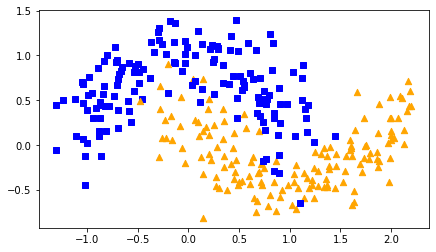

In [4]:
train_X, train_Y, test_X, test_Y = load_moons_dataset()

รูปที่ 3.23 ชุดข้อมูลสองประเภทที่เรียงตัวรูปจันทร์เสี้ยว 2 ดวง

สร้างโมเดล 3 ชั้นที่มีเซลล์แต่ละชั้นเท่ากับ 5,2,1 

In [ ]:
model = Sequential([
    Flatten(input_shape=[2]),
    Dense(5,  activation='relu'),
    Dense(2,  activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

การกำหนดตัวหาค่าเหมาะที่สุดจะอยู่ในขั้้นตอนคอมไพล์ โดยจะเปรียบเทียบระหว่างวิธี SGD() ที่ตั้งค่า momentum=0.9 
วิธี RMSprop() และวิธี Adam() ใช้อัตราการเรียนรู้ 0.01 ผู้อ่านสามารถเลือกระหว่าง 3 คำสั่งในเซลล์นี้ 
โดยสามารถทดลองเพิ่มการกำหนดค่าไฮเปอร์พารามิเตอร์ได้ตามต้องการ 


In [ ]:
# choose your optimizer
model.compile(optimizer=SGD(learning_rate=0.01,momentum=0.9),loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=RMSprop(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

ผึกจำนวน 5000 รอบ โดยแบ่งข้อมูลฝึกเป็นกลุ่มเล็กขนาด 32 พล็อตค่าความแม่นยำและค่าสูญเสียจากการฝึก รวมถึงเส้นแบ่งอาณาเขตเปรียบเทียบกันได้ผลดังในรูปที่ 
3.24 พบว่ามีสมรรถนะใกล้เคียงกัน  

In [ ]:
history = model.fit(train_X, train_Y, epochs=5000, batch_size=32,validation_data=(test_X,test_Y),verbose=0)
plot_acc_loss(history)

In [ ]:
plot_decision_regions(test_X, np.squeeze(test_Y), clf=model, legend=2)
plt.xlim([-1.5,2.5])
plt.ylim([-1.0,1.5])
plt.show()

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1zjvOGP62DQD2SDS_3Yf2torQ6sMF9OKA" width750 />
</p>
<div align="center">รูปที่ 3.24 เปรียบเทียบผลจากการใช้ตัวหาค่าเหมาะที่สุด 3 ประเภท</div>

### 3.4.5 การลดระดับอัตราการเรียนรู้

ในตัวอย่างที่ผ่านมาเราได้กำหนดอัตราการเรียนรู้เป็นค่าคงที่ตลอดการฝึก ข้อเสียคือเมื่อมีการแบ่งข้อมูลกลุ่มเล็กหรือใช้วิธีสโทแคสติก (รูปที่ 3.21) 
ค่าพารามิเตอร์ที่ถูกปรับแต่ละขั้นยังคงมีขนาดใหญ่แม้เข้าใกล้จุดต่ำสุด ดังนั้นเราสามารถปรับปรุงสมรรถนะของโมเดลได้โดยปรับค่าของอัตราเรียนรู้ให้มีค่าลดลงตามจำนวนรอบการฝึก
หลักการนี้เรียกว่า การลดระดับอัตราการเรียนรู้ (learning rate decay)

วิธีการพื้นฐานคือ ตั้งค่าอัตราการเรียนรู้ให้ขึ้นกับรอบของการประมวลผลข้อมูลทั้งชุด (ภาษาอังกฤษใช้คำว่า "epoch") 

$$
\alpha = \frac{1}{1+decay\_rate*epoch\_no}\alpha_0 \tag{3.43}
$$

โดย $\alpha_0$ คือค่าเริ่มต้นของอัตราการเรียนรู้ $decay\_rate$ คืออัตราการลดระดับ และ $epoch\_no$ คือหมายเลขของจำนวนรอบการฝึกเริ่มจาก 
$1,2,\ldots$ ตัวอย่างเช่นเมื่อกำหนด $\alpha_0 = 0.2, decay\_rate = 1$ 
ค่าอัตราการเรียนรู้เทียบกับจำนวนรอบจะมีค่า $0.1, 0.067, 0.05, 0.04, \ldots $

วิธีการอื่นที่มีการใช้งานกันคือการลดระดับเชิงเลขชี้กำลัง 

$$
\alpha = 0.95^{epoch\_no}\alpha_0 \tag{3.44}
$$

หรือในรูปตัวประกอบการลดระดับอื่นๆ เช่น

$$
\alpha = \frac{k}{\sqrt{epoch\_no}} \alpha_0 \tag{3.45}
$$

โดย $k$ คือค่าคงที่ การลดระดับอัตราการเรียนรู้อาจเป็นแบบไม่ต่อเนื่องก็ได้ สังเกตว่าใน (3.43)-(3.45) 
การลดระดับจะอยู่ในรูปสมการทางคณิตศาสตร์ อีกวิธีหนึ่งที่นิยมใช้คือการวัดค่าความแม่นยำหรือค่าสูญเสียระหว่างการฝึก 
เพื่อปรับค่าอัตราการเรียนรู้ให้เหมาะสม หากใช้ไลบรารี TF สามารถเขียนฟังก์ชันเรียกกลับเพื่อทำงานดังกล่าวได้ 

## 3.5 การทำกลุ่มให้เป็นบรรทัดฐาน

หัวข้อ 3.3.1 ได้กล่าวถึงการทำอินพุตให้เป็นบรรทัดฐานโดยหักค่าเฉลี่ยและใช้ความแปรปรวนปรับมาตราส่วน 
ซึ่งสามารถช่วยทำให้การฝึกข้อมูลทำงานเร็วขึ้น เราสามารถขยายหลักการนี้เพื่อใช้กับชั้นแฝงภายในโครงข่ายประสาทเทียมได้ 
เรียกวิธีนี้ว่า การทำกลุ่มให้เป็นบรรทัดฐาน (batch normalization) ถูกนำเสนอโดย Sergey Ioffe 
และ Christian Szegedy ในปี ค.ศ. 2015 ต่อไปจะเรียกโดยย่อว่า แบตช์นอร์ม 

แนวคิดของวิธีแบตช์นอร์มคือ พิจารณาชั้นแฝง $l$ ใน DNN ในการฝึกเพื่อปรับค่าพารามิเตอร์ $W^{[l]},b^{[l]}$ 
อินพุตของชั้นแฝงนี้คือ $a^{[l-1]}$ ซึ่งจากหลักการที่อธิบายในหัวข้อ 3.3.1 ต้องการเลื่อนและปรับมาตราส่วนข้อมูล $a^{[l-1]}$ 
เพื่อให้การปรับค่าพารามิเตอร์ $W^{[l]},b^{[l]}$ ทำได้อย่างมีประสิทธิภาพขึ้น อย่างไรก็ตามในการใช้วิธีแบตช์นอร์ม 
พบว่านิยมปรับค่าของ $z^{[l-1]}$ ซึ่งเป็นเอาต์พุตเชิงเส้นของชั้นก่อนหน้าก่อนจะผ่านฟังก์ชันกระตุ้น 

การอิมพลิเมนต์แบตช์นอร์มทำได้ดังนี้ พิจารณาชั้น $l$ ของ DNN เอาต์พุตในส่วนเชิงเส้นคือ $z^{(1)}, \ldots, z^{(m)}$
(เพื่อให้อ่านง่ายขึ้นจะละเว้นการระบุชั้น โดยเขียน $z^{(i)}$ แทน $z^{[l](i)}$) 

* คำนวณค่าเฉลี่ย
$$
\mu = \frac{1}{m}\sum_{i=1}^mz^{(i)} \tag{3.46}
$$

* คำนวณค่าความแปรปรวน
$$
\sigma^2 = \frac{1}{m}\sum_{i=1}^m(z^{(i)}-\mu)^2 \tag{3.47}
$$

*ปรับค่าเอาต์พุต $z^{(i)}$ ให้เป็นบรรทัดฐาน
$$
z_{norm}^{(i)} = \frac{z^{(i)}-\mu}{\sqrt{\sigma^2+\epsilon}} \tag{3.48}
$$

โดย $\epsilon$ ที่มีค่าน้อย ใส่ไว้เพื่อความเสถียรเชิงเลขกรณีที่ $\sigma^2 = 0$ 
แต่ว่าในกรณีของเซลล์ชั้นแฝงเราไม่ต้องการให้เอาต์พุตมีค่าเฉลี่ยเป็นศูนย์และความแปรปรวนหนึ่งหน่วยตลอดเวลา 
ดังนั้นจะปรับค่าเป็น
$$
\tilde{z}^{(i)} = \gamma z_{norm}^{(i)} + \beta \tag{3.49}
$$

และใช้ค่านี้ผ่านเข้าฟังก์ชันกระตุ้นแทน $z^{(i)}$ เดิม โดยค่าของ $\gamma, \beta$ คือพารามิเตอร์ที่เรียนรู้ได้ (learnable parameters) 
คือสามารถใช้ขั้นตอนวิธีลดค่าเกรเดียนต์ประเภทต่างๆ ที่กล่าวถึงแล้วในการปรับค่าพารามิเตอร์เข้าสู่ค่าเหมาะที่สุด 
สังเกตว่าค่า $\beta$ ในวิธีแบตช์นอร์มนี้ไม่มีส่วนเกี่ยวข้องใดๆ กับ $\beta$ ของวิธี EWA ที่กล่าวถึงในหัวข้อก่อนหน้านี้ 
เหตุผลเพียงต้องการคงไว้ให้เหมือนในบทความต้นกำเนิดสำหรับผู้ที่ต้องการศึกษาเพิ่มเติมจากบทความ 

ผลกระทบของ $\gamma, \beta$ คือช่วยทำให้เราสามารถปรับ $\tilde{z}^{(i)}$ 
ให้มีค่าเฉลี่ยและค่าความแปรปรวนตามต้องการก่อนผ่านเข้าสู่ฟังก์ชันกระตุ้นของชั้นแฝงนั้น 
ซึ่งวิธีการแบตช์นอร์มสามารถถูกใช้กับชั้นแฝงใดๆ ของ DNN 
ในการอิมพลิเมนต์โดยเขียนโค้ดเองอาจลดทอนความซับซ้อนของสมการลงได้เมื่อพิจารณาว่าค่าเอนเอียง $b$ และตัวแปร $\beta$ มีความซ้ำซ้อนกัน 
ทำให้สามารถตัดค่าเอนเอียง $b$ ทิ้งไปได้ อย่างไรก็ตาม ในการใช้ไลบรารีเช่น TF เราสามารถกำหนดชั้นแบตช์นอร์มได้โดยไม่จำเป็นต้องอิมพลิเมนต์ 
(3.46) - (3.49) เพียงสอดแทรกชั้น BatchNormalization() ในโมเดลตามตำแหน่งที่ต้องการ

**ตัวอย่าง 3.8**

ในตัวอย่างนี้จะสร้างโมเดล DNN สำหรับจำแนกเซตข้อมูล The Street View House Number (SVHN) จากเว็บไซต์ 
http://ufldl.stanford.edu/housenumbers/ โดยภาพจะเป็นเลขที่บ้านจริงที่เก็บภาพจาก Google Street View ซึ่งเป็นปัญหาที่ยากกว่าภาพจาก 
MNIST ถึงแม้ว่าจะเป็นการจำแนกตัวเลข 0 - 9 เช่นเดียวกัน แต่ละภาพมีขนาด 32 x 32 ตัวอย่างภาพแสดงในรูปที่ 3.25

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1zUgIFiiVQ61syZAghK1hVELEWz6ZvLRT" width750 />
</p>
<div align="center">รูปที่ 3.25 ตัวอย่างภาพจากเซตข้อมูล The Street View House Number (SVHN) 
<br>http://ufldl.stanford.edu/housenumbers/</div>

เข้าไปที่ลิงก์ของเว็บไซต์เพื่อดาวน์โหลดไฟล์ train_32x32.mat, test_32x32.mat เก็บในไดเรคทอรีย่อย /data 
หลังจากนั้นใช้ฟังก์ชัน loadmat() ของไลบรารี scipy.io เพื่อโหลดภาพ

In [3]:
train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

โดย train และ test คือดิกชันนารีที่มีคีย์ x และ y สำหรับภาพอินพุตและเลเบลตามลำดับ โดยมีจำนวนตัวอย่างฝึก 73257 และตัวอย่างทดสอบ 26032
ขั้นต่อมาคือแยกภาพและเลเบลสำหรับฝึกและทดสอบจากดิกชันนารี 
และเพื่อให้สอดคล้องกับรูปเทนเซอร์ที่ใช้กับโมเดล TF จะต้องสลับแกนให้จำนวนตัวอย่างเป็นมิติแรก

In [5]:
train_images_rgb, train_labels = train['X'],train['y']
test_images_rgb, test_labels = test['X'],test['y']

train_images_rgb = np.moveaxis(train_images_rgb, 3,0) # permute axis so that number of samples come first
test_images_rgb = np.moveaxis(test_images_rgb, 3,0)
N = train_images_rgb.shape[0]

เนื่องจากภาพสีไม่มีความสำคัญสำหรับการจำแนกในโจทย์ปัญหานี้ เราจะแปลงภาพเป็นสีเทาและปรับมาตราส่วนให้แต่ละพิกเซลมีค่า 0 - 1 
เพื่อทำให้ฝึกโมเดลได้มีประสิทธิภาพมากขึ้น (ป้องกันปัญหาค่าเกรเดียนต์สูงเกิน) ทดลองสุ่มภาพเพื่อแสดงจำนวน 10 ภาพ

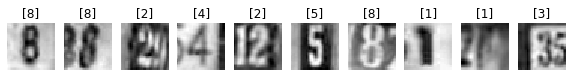

In [8]:
train_images = np.mean(train_images_rgb,axis=-1,keepdims=True)/255.
test_images = np.mean(test_images_rgb,axis=-1,keepdims=True)/255.
m = np.random.choice(N,10)
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].set_axis_off()
    ax[i].set_title(np.array2string(train_labels[m[i]]))
    ax[i].imshow(np.squeeze(train_images[m[i]]),cmap='gray')

มีอีกจุดหนึ่งที่ต้องแก้ไขสำหรับชุดข้อมูลนี้คือภาพที่แสดงเลข 0 จะมีเลเบลเป็น 10 เราจะเปลี่ยนเลเบลเป็น 0 

In [9]:
train_labels = np.where(train_labels==10,0,train_labels)
test_labels = np.where(test_labels==10,0,test_labels)

นำเข้าไลบรารีทั้งหมดที่ต้องการใช้ในการสร้างโมเดล DNN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping, LearningRateScheduler 
from tensorflow.keras.optimizers import Adam

เราจะทดลองใช้โมเดลที่มีชั้นปกติ 4 ชั้น มีเซลล์ 128, 256, 128, 10 และคั่นแต่ละชั้นแฝงด้วยชั้นแบตช์นอร์ม 
แต่ละชั้นใช้ฟังก์ชันกระตุ้นแบบ ReLU ยกเว้นชั้นเอาต์พุตที่เป็นแบบ softmax
(ผู้อ่านสามารถทดลองปรับหรือเพิ่มชั้นในโมเดลตามใจชอบ)

In [11]:
model = Sequential([
    Flatten(input_shape=(32,32,1)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dense(128, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'softmax')    
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               5

คอมไพล์โดยเลือกตัวหาค่าเหมาะที่สุดแบบ Adam อัตราการเรียนรู้ 0.001 

In [13]:
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ในการฝึกเราจะใช้วิธีการลดระดับอัตราการเรียนรู้ตามสมการ (3.43) โดยกำหนด $decay\_rate = 1$ เขียนเป็นฟังก์ชัน scheduler() ได้ดังนี้

In [14]:
def scheduler(epoch, lr):
    return lr * (1/(1+epoch))

สร้างเป็นฟังก์ชันเรียกกลับ LearningRateScheduler() 

In [15]:
lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

สำหรับฟังก์ชันเรียกกลับอีกตัวหนึ่งจะใช้เป็นแบบ EarlyStopping() เพื่อลดการฟิตเกิน

In [16]:
early_stopping = EarlyStopping(patience=3, monitor='val_accuracy', mode='max')

ใส่ค่าอาร์กิวเมนต์ของ model.fit() โดยเลืกจำนวนการฝึก 30 รอบ ขนาดกลุ่มเล็ก 256 แบ่งข้อมูล 15% สำหรับตรวจสอบ 
และกำหนดค่าฟังก์ชันเรียกกลับที่สร้างไว้

In [17]:
history=model.fit(train_images, train_labels, epochs=30, batch_size=256, validation_split = 0.15,
                  callbacks=[lr_scheduler,early_stopping])

Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.0010000000474974513.
244/244 [==============================] - 2s 5ms/step - loss: 1.2752 - accuracy: 0.5945 - val_loss: 1.5027 - val_accuracy: 0.5138
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0005000000237487257.
244/244 [==============================] - 1s 4ms/step - loss: 0.7923 - accuracy: 0.7576 - val_loss: 1.1212 - val_accuracy: 0.6352
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.00016666667458290854.
244/244 [==============================] - 1s 4ms/step - loss: 0.6693 - accuracy: 0.7987 - val_loss: 0.8090 - val_accuracy: 0.7485
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 4.166666985838674e-05.
244/244 [==============================] - 1s 4ms/step - loss: 0.6211 - accuracy: 0.8133 - val_loss: 0.6745 - val_accuracy: 0.7954
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 8.333333971677348e-06.


จากเอาต์พุตจะเห็นว่าในแต่ละรอบค่าอัตราการเรียนรู้ลดลงตาม (3.43) และจะหยุดการฝึกเมื่อเงื่อนไขที่กำหนดใน EarlyStopping() เป็นจริง 
พล็อตค่าความแม่นยำและค่าสูญเสียได้ดังในรูปที่ 3.26

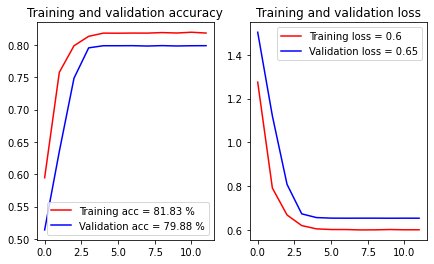

In [19]:
plot_acc_loss(history)

รูปที่ 3.26 ค่าความแม่นยำและค่าสูญเสียสำหรับตัวอย่าง 3.8 

เราสามารถประเมินความแม่นยำและค่าสูญเสียจากภาพที่ใช้ทดสอบโดยคำสั่ง model.evaluate() 

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.738
Test accuracy: 77.86%


รูปที่ 3.27 แสดงการสุ่มภาพจำนวน 5 ภาพจากชุดข้อมูลทดสอบ และดูผลการพยากรณ์จากโมเดลเปรียบเทียบกับเลเบลจริง 
กราฟแท่งทางด้านขวาแสดงค่าความน่าจะเป็นจากชั้นเอาต์พุตของโมเดล ซึ่งค่าสูงสุดคือตัวเลขที่โมเดลพยากรณ์
รันเซลล์ด้านล่างหลายครั้งเพื่อเปลี่ยนภาพ สังเกตภาพที่โมเดลพยากรณ์ไม่ถูกต้องว่ามีองค์ประกอบใดที่สร้างความสับสน 

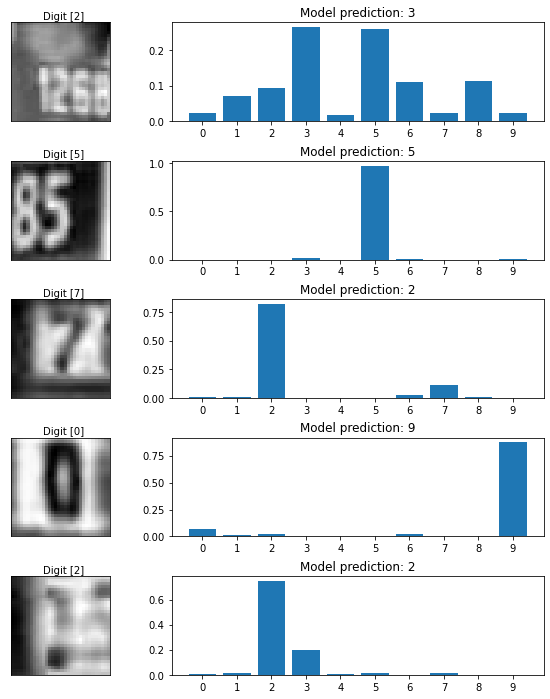

In [22]:
num_test_images = test_images.shape[0]
random_inx = np.random.choice(num_test_images, 5)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

DNN_predictions = model.predict(random_test_images) 

fig, axes = plt.subplots(5, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(DNN_predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image),cmap='gray')
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Model prediction: {np.argmax(prediction)}")

plt.show()

รูปที่ 3.27 ผลการพยากรณ์ภาพโดยโมเดล DNN

## 3.6 สรุปท้ายบท

เนื้อหาในบทนี้กล่าวถึงการปรับปรุงโมเดล DNN เพื่อเพิ่มประสิทธิภาพการเรียนรู้ โดยประกอบด้วยหลายส่วนตั้งแต่การจัดรูปข้อมูลเพื่อช่วยให้การฝึกง่ายและเร็วขึ้น 
การลดการฟิตเกินโดยทำเรกูลาร์ไรเซชันแบบต่างๆ วิธีดรอปเอาต์ และการหยุดฝึกตามเงื่อนไขที่กำหนด 
การกำหนดค่าเริ่มต้นของพารามิเตอร์สามารถช่วยให้ขั้นตอนวิธีลดค่าเกรเดียนต์ทำงานเร็วขึ้นโดยไม่ทำให้เกรเดียนต์มีค่ามากหรือน้อยเกินไป 

จากขั้นตอนวิธีลดค่าเกรเดียนต์ขั้นพื้นฐานได้มีการปรับปรุงสมรรถนะโดยเพิ่มพจน์ที่ช่วยลดทอนการแกว่งของความชันพารามิเตอร์ โดยทั่วไปวิธีการโมเมนตัม 
RMSprop หรือ Adam จะให้ผลดีกว่า SGD ดังนั้นจึงเป็นที่นิยมในการฝึกโมเดล โดยอาจใช้ร่วมกับวิธีการลดระดับอัตราการเรียนรู้ตามจำนวนรอบการฝึก 

การเพิ่มชั้นแบตช์นอร์มเป็นอีกวิธีหนึ่งในการปรับปรุงโมเดล โดยหลักการคือทำให้ค่าเฉลี่ยและความแปรปรวนของเอาต์พุตของชั้นแฝงเป็นพารามิเตอร์ที่เรียนรู้ได้ 
ทำให้มีค่าเหมาะสมสำหรับฟังก์ชันกระตุ้นในชั้นแฝงนั้น 

ถึงแม้ว่าโดยภาพรวมแล้วโมเดล DNN จะประกอบด้วยไฮเปอร์พารามิเตอร์หลายตัว แต่จะพบว่าบางตัวไม่มีผลกระทบเด่นชัดกับสมรรถนะการเรียนรู้ 
ตัวอย่างเช่นค่า $\epsilon$ ที่ใส่ไว้เพื่อป้องกันการหารด้วยค่าศูนย์จะไม่เห็นความแตกต่างระหว่างค่า $10^{-6}, 10^{-7}, 10^{-8}$ 
ดังนั้นจึงไม่ควรเสียเวลาเพื่อแปรค่าไฮเปอร์พารามิเตอร์ตัวนี้ แตกต่างจากอัตราการเรียนรู้ $\alpha$ ซึ่งอาจต้องใช้เวลาในการปรับแต่งเพื่อให้ได้ผลดี

การปรับแต่งค่าไฮเปอร์พารามิเตอร์เป็นเพียงการทำให้โมเดลมีคุณภาพดีที่สุดเท่าที่จะทำได้สำหรับสถาปัตยกรรมโครงข่ายประสาทเทียมที่ใช้อยู่ 
หากพบว่าความแม่นยำยังไม่เป็นที่พอใจอาจต้องพิจารณาสถาปัตยกรรมอื่นที่เหมาะสมสำหรับโจทย์ปัญหานั้น ตัวอย่างเช่นในการจำแนกภาพโดยทั่วไป 
เรามักจะพบว่าการปรับแต่งไฮเปอร์พารามิเตอร์ไม่สามารถช่วยให้โมเดล DNN มีความแม่นยำสูงเกิน 90% ได้ 
ในบทต่อไปจะกล่าวถึงสถาปัตยกรรมที่เหมาะสมกว่าสำหรับงานจำแนกภาพ


## โจทย์ปัญหา

3-1 จากชุดข้อมูลที่มีให้ในไลบรารี sklearn ดังโจทย์ปัญหาข้อ 2-4 เขียนโค้ดไพธอนเพื่อสุ่มแยกข้อมูลเป็นชุดฝึกและชุดทดสอบตามอัตราส่วนที่กำหนด 
เช่น 80%, 20 % 

3-2 ในการฝึกโมเดลโดยไลบรารี TF เราสามารถกันข้อมูลส่วนหนึ่งเป็นชุดสำหรับตรวจสอบได้โดยใช้อาร์กิวเมนต์ 
validation_split ในเมธอด model.fit() เช่น validation_split=0.2 จะแยกข้อมูล 20% จากข้อมูลทั้งหมดสำหรับใช้ตรวจสอบ 
สร้างโมเดลเพื่อฝึกโดยใช้ข้อมูลจากโจทย์ข้อ 3-1 เปรียบเทียบระหว่างโมเดลเส้นฐาน การทำเรกูลาร์ไรเซชัน และดรอปเอาต์

3-3 จากตัวอย่าง 3.5 ทดลองฝึกโมเดลด้วยจำนวนรอบที่มากขึ้น ผลการจำแนกมีความแม่นยำมากขึ้นหรือไม่ อธิบาย

3-4 จากตัวอย่าง 3.5 ตั้งค่าเริ่มต้นของค่าน้ำหนัก $W \in [a,b]$ โดยทดลองแปรค่าต่ำสุดและสูงสุด (อาจเลือกเป็นค่าลบได้โดย $a<b$) เพื่อดูผลที่เกิดขึ้น 
ท่านสามารถหาค่าของ $a, b$ ที่ให้ผลการพยากรณ์เป็นที่น่าพอใจได้หรือไม่

3-5 มีการนำเสนอการตั้งค่าเริ่มต้นเพื่อกำหนดความแปรปรวนของ $W^{[l]}$ ในรูปแบบอื่นเช่น $\frac{2}{n^{[l-1]}+n^{[l]}}$ 
สามารถทดลองใช้โดยตั้งค่า initializer เป็นแบบ GlorotNormal ทดลองใช้เพื่อเปรียบเทียบผลกับตัวอย่าง 3.6 

3-6 ในการใช้ไลบรารี TF สามารถเปิดใช้วิธีโมเมนตัมในตัวหาค่าเหมาะที่สุดแบบ SGD() โดยกำหนดค่า momentum 
ให้มีค่ามากกว่าศูนย์ โดยการปรับค่าพารามิเตอร์ $w$ สำหรับเกรเดียนต์ $g$ จะเป็นดังนี้

velocity = momentum*velocity - learning_rate*g
w = w + velocity

* เชื่อมโยงความสัมพันธ์ของโค้ดนี้กับเค้าโครงที่นำเสนอในหัวข้อย่อย 3.4.2 
* ทดลองใช้โมเมนตัมกับข้อมูลในตัวอย่าง 3.6 เปรียบเทียบข้อมูลจากการฝึกเพื่อตรวจสอบว่าตัวหาค่าเหมาะที่สุดทำงานเร็วขึ้นหรือไม่

3-7 วิธีการโมเมนตัมที่ถูกขยายเป็นขั้นสูงขึ้นเรียกว่า nesterov ซึ่งเลือกใช้ได้ในไลบรารี TF การเปิดใช้งานทำได้โดยตั้งค่า nesterov=True 
เป็นอาร์กิวเมนต์ของ SGD() กฏการปรับค่าเป็นดังนี้

velocity = momentum * velocity - learning_rate * g
w = w + momentum * velocity - learning_rate * g

ทดลองใช้วิธี nesterov กับข้อมูลในตัวอย่าง 3.6

3-8 จากตัวอย่าง 3.7 เลือกตัวหาค่าเหมาะที่สุดวิธีที่ท่านชอบ เขียนฟังก์ชันเรียกกลับเพื่อปรับค่าอัตราการเรียนรู้ให้ลดลงโดยใช้ไลบรารี
tf.keras.callbacks.LearningRateScheduler()

3-9 ทดลองปรับเปลี่ยนหรือเพิ่มเติมชั้นและไฮเปอร์พารามิเตอร์ของโมเดลในตัวอย่าง 3.8 ค่าความแม่นยำที่ดีที่สุดที่ท่านทำได้คือเท่าไร




<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja 2022</div>